# 2. Renaming and merging

Note: Half datasets, with separate files for east and west subplots have been merged manually in excel

In [33]:
%%time

import pandas as pd
import numpy as np
import math
import os
import datetime
from copy import copy
from pprint import pprint

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# To display df nicely in loops
from IPython.display import display 
# display(df1.head()) 
# display(df2.head())

# Display rows and columns Pandas
pd.options.display.max_columns = 100
pd.set_option('display.max_rows',100)

Wall time: 0 ns


In [34]:
# Prints the current working directory
os.getcwd()
# os.listdir()

'C:\\Users\\fahad\\MegaSync\\NMBU\\GitHub\\vPheno'

## Finding Username folder to make general path for multi PC use

In [35]:
username = str(os.getcwd()).split('\\')[2]
username

'fahad'

## Importing Data

In [36]:
path = r'./Data/'
path_complete = r'./Data/complete/'
path_incomplete = r'./Data/incomplete/'

path_yield = r'C:\\Users\\'+username+'\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021'

export_path = './Data/Renamed_merged/'
os.listdir(path)

['complete', 'incomplete', 'Renamed_merged', 'std_columns.json']

## Data Preparation
### Creating list of complete files

In [37]:
# Get the list of all files in directory tree at given path

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path_complete):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files founnd in the directory')
# files_with_address
# files_list

57 files founnd in the directory


## Data Checking/control

### Check for duplicate filenames

In [38]:
print('Total number of files are :', len(files_list))

print('Number of unique file names are:', len(set(files_list)))

print('There is/are', len(files_list) - len(set(files_list)),'duplicate file name/names.')

Total number of files are : 57
Number of unique file names are: 57
There is/are 0 duplicate file name/names.


In [39]:
len(files_with_address)
# files_with_address

57

### Checking number of unique cultivars in the field

In [40]:
# plots_data = pd.read_excel(files_with_address[0],engine='openpyxl')
# # Pandas converts 'NA' string to NaN. Need to change those to 
# # some string to get a count as NaNs are not counted as unique values

# plots_data.Name.fillna('-', inplace=True)
# plots_data.CodeName.fillna('-', inplace=True)

# # Creating a new column as multiple plots were named 'NA' but the 
# # CodeName was different for each one of them
# plots_data['NameCode'] = plots_data.Name+plots_data.CodeName

# plots_data
# len(plots_data.NameCode.unique())
# plots_data.NameCode.value_counts()
# # plots_data.NameCode.value_counts().sum()
# # plots_data

## Importing data files to Pandas

In [41]:
%%time

all_df = []
for data in files_with_address:
    file_name = os.path.splitext(os.path.basename(data))[0]

    # Replce all invalid characters in the name
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace("(", "")
    df_name = file_name.replace(")", "")

    all_df.append(df_name)

    locals()[df_name] = pd.read_csv(data, index_col=False)
    print(df_name, '=====', locals()[df_name].shape)

Graminor_250719 ===== (600, 46)
Graminor_050719_one_missing_row_deleted ===== (600, 49)
Graminor_060619 ===== (600, 49)
Graminor_070819_2 ===== (600, 49)
Graminor_110619 ===== (600, 49)
Graminor_150719 ===== (600, 49)
Graminor_150819 ===== (600, 49)
Graminor_280619_corrected ===== (600, 49)
Graminor_eastwest_020719_NIR_half_missing ===== (600, 22)
Graminor_eastwest_040720 ===== (800, 49)
Graminor_eastwest_040820 ===== (793, 22)
Graminor_eastwest_050819 ===== (600, 49)
Graminor_eastwest_070720_correct ===== (800, 49)
Graminor_eastwest_130720 ===== (800, 22)
Graminor_eastwest_140820 ===== (800, 49)
Graminor_eastwest_300720 ===== (787, 22)
Graminor_east_010720 ===== (400, 51)
Graminor_east_110719 ===== (300, 49)
Graminor_east_170720.cpg ===== (400, 49)
Graminor_east_180620 ===== (400, 46)
Graminor_east_200720 ===== (400, 22)
Graminor_Mica_eastcorrect_west_240620 ===== (757, 49)
Masbasis_050719_corrected ===== (528, 49)
Masbasis_060619_Indices ===== (528, 56)
Masbasis_070819_correct ===== 

In [42]:
print(f'Total imported {len(all_df)}')

Total imported 57


# Drop derieved indices

## Import and process standard columns json

In [43]:
a_file = open("Data\std_columns.json", "r")
import_columns = a_file.read()
type(import_columns)

# Converting list stored as string to list
import_columns = import_columns.strip('][').split(', ')

# Stripping extra quotes enclosing the strings
x=0
std_columns = []
for item in import_columns: 
    std_columns.append(item[1:-1])
    x=+1
std_columns

['Plot_ID',
 'Blue_Mean_Value',
 'Blue_Median_Value',
 'Blue_Std_Dev_Value',
 'Green_Mean_Value',
 'Green_Median_Value',
 'Green_Std_Dev_Value',
 'Red_Mean_Value',
 'Red_Median_Value',
 'Red_Std_Dev_Value',
 'RedEdge_Mean_Value',
 'RedEdge_Median_Value',
 'RedEdge_Std_Dev_Value',
 'NIR_Mean_Value',
 'NIR_Median_Value',
 'NIR_Std_Dev_Value']

In [44]:
# Creating lists of standard columns for Mean, Median and Std_Dev

std_columns_mean = ['Plot_ID']
std_columns_median = ['Plot_ID']
std_columns_stdev = ['Plot_ID']

for item in std_columns:
    if item.find("Mean") != -1:
        std_columns_mean.append(item)
    if item.find("Median") != -1:
        std_columns_median.append(item)
    if item.find("Std_Dev") != -1:
        std_columns_stdev.append(item)
print(std_columns_mean)
print(std_columns_median)
print(std_columns_stdev)

['Plot_ID', 'Blue_Mean_Value', 'Green_Mean_Value', 'Red_Mean_Value', 'RedEdge_Mean_Value', 'NIR_Mean_Value']
['Plot_ID', 'Blue_Median_Value', 'Green_Median_Value', 'Red_Median_Value', 'RedEdge_Median_Value', 'NIR_Median_Value']
['Plot_ID', 'Blue_Std_Dev_Value', 'Green_Std_Dev_Value', 'Red_Std_Dev_Value', 'RedEdge_Std_Dev_Value', 'NIR_Std_Dev_Value']


## Dropping extra/derieved indices columns from dataframes

In [45]:
# Filtering the datasets with only the standard columns

for df in all_df:
    locals()[df] = locals()[df].copy()[std_columns]

# Dropping NAN

## Finding NAN values

In [46]:
# Finding number of missing values in each dataframe
df_with_nan = []
missing_values = False
for df in all_df:
    if locals()[df].isna().sum().sum() > 0:
        print(f'Total missing values in {df} are {locals()[df].isna().sum().sum()}')
        missing_values = True
        df_with_nan.append(df)
if not missing_values:
    print('No missing value found in any dataframe')

Total missing values in Graminor_eastwest_020719_NIR_half_missing are 900


In [47]:
df_with_nan

['Graminor_eastwest_020719_NIR_half_missing']

## Drop rows with missing values in df_with_nan

In [48]:
print(f'{Graminor_eastwest_020719_NIR_half_missing.shape} Before dropping')
Graminor_eastwest_020719_NIR_half_missing.dropna(inplace=True)
print(f'{Graminor_eastwest_020719_NIR_half_missing.shape} After dropping')


(600, 16) Before dropping
(300, 16) After dropping


## ORRR

### Droppping df with Nan from the all_df_std

In [49]:
print(f'Number of items in all_df is {len(all_df)}')

Number of items in all_df is 57


In [50]:
# for df in df_with_nan:
#     all_df.remove(df)

In [51]:
print(f'Number of items in all_df now is {len(all_df)}')

Number of items in all_df now is 57


# Standardizing the names

## Creating a dictionary with all dates for a certain field for a certain year

In [52]:
len(all_df)
all_df

['Graminor_250719',
 'Graminor_050719_one_missing_row_deleted',
 'Graminor_060619',
 'Graminor_070819_2',
 'Graminor_110619',
 'Graminor_150719',
 'Graminor_150819',
 'Graminor_280619_corrected',
 'Graminor_eastwest_020719_NIR_half_missing',
 'Graminor_eastwest_040720',
 'Graminor_eastwest_040820',
 'Graminor_eastwest_050819',
 'Graminor_eastwest_070720_correct',
 'Graminor_eastwest_130720',
 'Graminor_eastwest_140820',
 'Graminor_eastwest_300720',
 'Graminor_east_010720',
 'Graminor_east_110719',
 'Graminor_east_170720.cpg',
 'Graminor_east_180620',
 'Graminor_east_200720',
 'Graminor_Mica_eastcorrect_west_240620',
 'Masbasis_050719_corrected',
 'Masbasis_060619_Indices',
 'Masbasis_070819_correct',
 'Masbasis_150719',
 'Masbasis_220719_correct',
 'Masbasis_260619_color_and_othe_indecies',
 'Masbasis_290719',
 'Masbasis_indices_280619',
 'Masbasis_Mica_010720',
 'Masbasis_Mica_070820',
 'Masbasis_Mica_080720',
 'Masbasis_Mica_120820',
 'Masbasis_Mica_130720',
 'Masbasis_Mica_140820',


In [53]:
%%time

elements_to_strip = "abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ_-()."

all_df_std = []

field_year_dict = {}

for df in all_df:
    
    # Getting date from the df name
    date1 = copy(df)

    for x in range(3):
        date1 = date1.rstrip(elements_to_strip)
        date1 = date1.lstrip(elements_to_strip)
        for c in range(3):
            date1 = date1.rstrip(elements_to_strip)
            date1 = date1.lstrip(elements_to_strip)
        date1 = date1.split('_')[0]
    
    field_name = df.split('_')[0]
    field_name = field_name.split('-')[0]

    new_df_name = field_name +'_'+date1
    
    # Drop all columns except the std columns 
    locals()[new_df_name] = locals()[df][std_columns]
    
    all_df_std.append(new_df_name)

    
    
    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    if dict_key in field_year_dict:
        field_year_dict[dict_key].append(date1)
    else:
        field_year_dict[dict_key] = [date1]
        
#     print(date1)
print('field_year_dict created.')

pprint(field_year_dict)
# all_df_std


field_year_dict created.
{'Graminor_2019': ['250719',
                   '050719',
                   '060619',
                   '070819',
                   '110619',
                   '150719',
                   '150819',
                   '280619',
                   '020719',
                   '050819',
                   '110719'],
 'Graminor_2020': ['040720',
                   '040820',
                   '070720',
                   '130720',
                   '140820',
                   '300720',
                   '010720',
                   '170720',
                   '180620',
                   '200720',
                   '240620'],
 'Masbasis_2019': ['050719',
                   '060619',
                   '070819',
                   '150719',
                   '220719',
                   '260619',
                   '290719',
                   '280619'],
 'Masbasis_2020': ['010720',
                   '070820',
                   '080720',
               

In [54]:
for df in all_df_std:
    print(df, locals()[df].shape)

Graminor_250719 (600, 16)
Graminor_050719 (600, 16)
Graminor_060619 (600, 16)
Graminor_070819 (600, 16)
Graminor_110619 (600, 16)
Graminor_150719 (600, 16)
Graminor_150819 (600, 16)
Graminor_280619 (600, 16)
Graminor_020719 (300, 16)
Graminor_040720 (800, 16)
Graminor_040820 (793, 16)
Graminor_050819 (600, 16)
Graminor_070720 (800, 16)
Graminor_130720 (800, 16)
Graminor_140820 (800, 16)
Graminor_300720 (787, 16)
Graminor_010720 (400, 16)
Graminor_110719 (300, 16)
Graminor_170720 (400, 16)
Graminor_180620 (400, 16)
Graminor_200720 (400, 16)
Graminor_240620 (757, 16)
Masbasis_050719 (528, 16)
Masbasis_060619 (528, 16)
Masbasis_070819 (528, 16)
Masbasis_150719 (528, 16)
Masbasis_220719 (528, 16)
Masbasis_260619 (528, 16)
Masbasis_290719 (528, 16)
Masbasis_280619 (528, 16)
Masbasis_010720 (688, 16)
Masbasis_070820 (688, 16)
Masbasis_080720 (688, 16)
Masbasis_120820 (688, 16)
Masbasis_130720 (688, 16)
Masbasis_140820 (688, 16)
Masbasis_170720 (688, 16)
Masbasis_180620 (688, 16)
Masbasis_220

In [55]:

if len(all_df_std) > len(set(all_df_std)):
    print(f'Error:\nThere is/are {len(all_df_std) - len(set(all_df_std))} duplicates in the data out of total {len(all_df_std)}.\n \
    Make sure no dataset has been lost because of data being separated in east/west fields on the same date')
    # Printing the names of the duplicate datasets, if any
    find_duplicates=[]
    for i in all_df_std:
        if i not in find_duplicates:
            find_duplicates.append(i)
        else:
            print(f'Duplicate dataset named \'{i}\',\n')
else:
    print('No duplicate dataset found')

Error:
There is/are 1 duplicates in the data out of total 57.
     Make sure no dataset has been lost because of data being separated in east/west fields on the same date
Duplicate dataset named 'Masbasis_300720',



### Arranging the dates in field_year_Dict in ascending order


In [56]:
sorted_field_year_dict = {}
for key, dates_list in field_year_dict.items():
    # Converting the dates to a datetime date object and sorting them in list
    sorted_dated = sorted([
        datetime.datetime.strptime(date, '%d%m%y').date()
        for date in dates_list])

    sorted_field_year_dict[key] = sorted_dated

pprint(sorted_field_year_dict)

{'Graminor_2019': [datetime.date(2019, 6, 6),
                   datetime.date(2019, 6, 11),
                   datetime.date(2019, 6, 28),
                   datetime.date(2019, 7, 2),
                   datetime.date(2019, 7, 5),
                   datetime.date(2019, 7, 11),
                   datetime.date(2019, 7, 15),
                   datetime.date(2019, 7, 25),
                   datetime.date(2019, 8, 5),
                   datetime.date(2019, 8, 7),
                   datetime.date(2019, 8, 15)],
 'Graminor_2020': [datetime.date(2020, 6, 18),
                   datetime.date(2020, 6, 24),
                   datetime.date(2020, 7, 1),
                   datetime.date(2020, 7, 4),
                   datetime.date(2020, 7, 7),
                   datetime.date(2020, 7, 13),
                   datetime.date(2020, 7, 17),
                   datetime.date(2020, 7, 20),
                   datetime.date(2020, 7, 30),
                   datetime.date(2020, 8, 4),
                   da

# Identify & drop duplicate sub-plots in each datasets, if any

In [57]:
found_duplicates = False
for df in all_df_std:
    duplicates = locals()[df][locals()[df].duplicated(subset='Plot_ID')]['Plot_ID']
    if duplicates.size > 0:
        found_duplicates = True
        print(f'Following {duplicates.size} duplicates in {df} ')
        for x in range(duplicates.size):
            print(duplicates.iloc[x])
if not found_duplicates:
    print(f'No duplicate subplots found in any dataset.')

Following 1 duplicates in Graminor_050719 
837


## ToDo: Duplicate plot number found. All the band values are different but the Plot_ID is the same. Need to implement checks to make sure that duplicate plots are not there in the data.

### Finding out which plots are duplicate/ non-unique

In [58]:
plot_list_series = Masbasis_130720.Plot_ID
plot_list_series[plot_list_series.duplicated()]

Series([], Name: Plot_ID, dtype: int64)

In [59]:
print(f'Manual search indicate the problem is at index {Masbasis_130720.Plot_ID.tolist().index(1727)} as well')
print(f'Number of plots {len(plot_list_series)}, vs Number of non-duplicate plots {len(set(plot_list_series))}')

Manual search indicate the problem is at index 293 as well
Number of plots 688, vs Number of non-duplicate plots 688


In [60]:
print(f'Number of plots {len(plot_list_series)}, vs Number of non-duplicate plots {len(set(plot_list_series))}')
print(Masbasis_130720.iloc[379,:])
print(Masbasis_130720.iloc[293,:])
Masbasis_130720.iloc[379,:] == Masbasis_130720.iloc[293,:]


Number of plots 688, vs Number of non-duplicate plots 688
Plot_ID                  1827.000000
Blue_Mean_Value             0.004315
Blue_Median_Value           0.004155
Blue_Std_Dev_Value          0.001230
Green_Mean_Value            0.010959
Green_Median_Value          0.010581
Green_Std_Dev_Value         0.003384
Red_Mean_Value              0.006048
Red_Median_Value            0.005484
Red_Std_Dev_Value           0.002242
RedEdge_Mean_Value          0.027218
RedEdge_Median_Value        0.026672
RedEdge_Std_Dev_Value       0.006525
NIR_Mean_Value              0.097022
NIR_Median_Value            0.097314
NIR_Std_Dev_Value           0.015057
Name: 379, dtype: float64
Plot_ID                  1727.000000
Blue_Mean_Value             0.004014
Blue_Median_Value           0.003858
Blue_Std_Dev_Value          0.000914
Green_Mean_Value            0.009829
Green_Median_Value          0.009518
Green_Std_Dev_Value         0.002195
Red_Mean_Value              0.004742
Red_Median_Value            

Plot_ID                  False
Blue_Mean_Value          False
Blue_Median_Value        False
Blue_Std_Dev_Value       False
Green_Mean_Value         False
Green_Median_Value       False
Green_Std_Dev_Value      False
Red_Mean_Value           False
Red_Median_Value         False
Red_Std_Dev_Value        False
RedEdge_Mean_Value       False
RedEdge_Median_Value     False
RedEdge_Std_Dev_Value    False
NIR_Mean_Value           False
NIR_Median_Value         False
NIR_Std_Dev_Value        False
dtype: bool

In [61]:
plots_list = (np.array(Masbasis_130720.Plot_ID.tolist()))

# ToDo Fihure out the problem in the following code
seen = set(plots_list)
uniq = [x for x in plots_list if x not in seen and not seen.add(x)] 
uniq

[]

There are no duplicate datasets.  
There is a slight possibility that there may be duplicate sub-plots in a field. That is yet to be checked.


# ToDo: Find grain yield, DH, DT etc values and attach to the dataframes

In [62]:
os.listdir(path_yield)

['Graminor_2019', 'Masbasis_2019', 'Staur_2019', 'Vollebekke-total_2020']

## Data Preparation
### Creating list of all files

In [63]:
# Get the list of all files in directory tree at given path_yield

files_with_address = []
files_list = []

for (dirpath, dirnames, filenames) in os.walk(path_yield):
    files_with_address += [os.path.join(dirpath, file) for file in filenames]
    files_list.extend(filenames)
    
print(len(files_with_address), 'files found in the directory')
# files_with_address
# files_list
files_with_address_bkp = copy(files_with_address)

74 files found in the directory


### Checking if there are multiple sheets in the files

In [64]:
# Print number of sheets in all files
print('The following files have multiple sheets.')

list_multi_sheet = []
for file in files_with_address:
    
    xl_file = pd.ExcelFile(file,engine='openpyxl')
    number_of_sheets = len(xl_file.sheet_names)
    if number_of_sheets > 1:
        print(number_of_sheets, os.path.basename(file), 'in folder', os.path.basename(os.path.dirname(file))
)
        list_multi_sheet.append(file)

The following files have multiple sheets.
4 19TvPhenores.xlsx in folder Graminor_2019
4 19TvPhenores pedigree.xlsx in folder Staur_2019
4 19TvPhenores.xlsx in folder Staur_2019
3 20BMLGI1_2020_tm.xlsx in folder Masbasis
3 Masbasis_Mica_2020_all_dates_MEDIAN_DP.xlsx in folder Masbasis
3 ROBOT_2020.xlsx in folder Robot


In [65]:
# Files dropped in the initial stage
list_multi_sheet

['C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Graminor_2019\\19TvPhenores.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Staur_2019\\19TvPhenores pedigree.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Staur_2019\\19TvPhenores.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Vollebekke-total_2020\\Masbasis\\20BMLGI1_2020_tm.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Vollebekke-total_2020\\Masbasis\\Masbasis_Mica_2020_all_dates_MEDIAN_DP.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Vollebekke-total_2020\\Robot\\ROBOT_2020.xlsx']

### Identifying files without dates
(with 2019 in name means they dont have date format)

In [66]:
files_w_2019 = []
for file in files_with_address:
    file_name = os.path.basename(file)
    if '2019' in file_name:
        print(file_name, 'in folder', os.path.basename(os.path.dirname(file)))
        files_w_2019.append(file)

Field_data_2019.xlsx in folder Masbasis_2019
Masbasis_2019_ForDP_median.xlsx in folder Masbasis_2019
NEW_Field_data_2019.xlsx in folder Masbasis_2019
Staur_Graminor_2019_median.xlsx in folder Staur_2019
Staur_Masbasis_2019.xlsx in folder Staur_2019


In [67]:
files_w_2019

['C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Masbasis_2019\\Field_data_2019.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Masbasis_2019\\Masbasis_2019_ForDP_median.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Masbasis_2019\\NEW_Field_data_2019.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Staur_2019\\Staur_Graminor_2019_median.xlsx',
 'C:\\\\Users\\\\fahad\\MegaSync\\NMBU\\Master Thesis\\Data\\Feb2021\\Staur_2019\\Staur_Masbasis_2019.xlsx']

In [68]:
len(all_df_std)

57

### Importing all files & their sheets into pandas

In [69]:
%%time

df_yield = []

for data in list_multi_sheet+files_w_2019:
    file_name = os.path.splitext(os.path.basename(data))[0]
    # Moving numbers to the end of the string/file_name
    parent_dir = os.path.dirname(data).split('\\')[-1]
    file_name = parent_dir+'_x_'+file_name
        
#     # Parent dir
#     dir1_name = os.path.basename(os.path.dirname(data))
#     # grand parent dir
#     dir2_name = os.path.basename(os.path.dirname(os.path.dirname(data)))

    # Replce all invalid characters in the name
    file_name = file_name.replace("-", "_")
    file_name = file_name.replace(" ", "_")
    file_name = file_name.replace("(", "")
    file_name = file_name.replace(")", "")

    xl_file = pd.ExcelFile(data,engine='openpyxl')
    
    for sheet in xl_file.sheet_names:
        if len(xl_file.sheet_names)>1:
            sheet_str = sheet
            sheet_str = sheet_str.replace("-", "_")
            sheet_str = sheet_str.replace(" ", "_")
            sheet_str = sheet_str.replace("(", "")
            sheet_str = sheet_str.replace(")", "")
            sheet_str = sheet_str.replace(".", "")

            df_name = file_name+'_x_'+sheet_str
            
        else:
            df_name = file_name
        df_yield.append(df_name)
        print(df_name)
        
        locals()[df_name] = pd.read_excel(data, sheet_name=sheet, engine='openpyxl')


Graminor_2019_x_19TvPhenores_x_Staur_kart
Graminor_2019_x_19TvPhenores_x_Staur_res
Graminor_2019_x_19TvPhenores_x_Vollebekk_kart
Graminor_2019_x_19TvPhenores_x_Vollebekk_res
Staur_2019_x_19TvPhenores_pedigree_x_Staur_kart
Staur_2019_x_19TvPhenores_pedigree_x_Staur_res
Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_kart
Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res
Staur_2019_x_19TvPhenores_x_Staur_kart
Staur_2019_x_19TvPhenores_x_Staur_res
Staur_2019_x_19TvPhenores_x_Vollebekk_kart
Staur_2019_x_19TvPhenores_x_Vollebekk_res
Masbasis_x_20BMLGI1_2020_tm_x_data
Masbasis_x_20BMLGI1_2020_tm_x_lsmeans
Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer
Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Sheet1
Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_biomass
Masbasis_x_Masbasis_Mica_2020_all_dates_MEDIAN_DP_x_Without_loadging
Robot_x_ROBOT_2020_x_raw
Robot_x_ROBOT_2020_x_lsmeans_EntryRobot_x_Fert
Robot_x_ROBOT_2020_x_layout
Masbasis_2019_x_Field_data_2019
Masbasis_2019_x_Masbasis_2019_

## Identifying the sheets with yield data

In [70]:
# Listing datasets for reference
for df in all_df_std:
    print(df, locals()[df].shape, locals()[df]['Plot_ID'].min(), locals()[df]['Plot_ID'].max())

Graminor_250719 (600, 16) 101 875
Graminor_050719 (600, 16) 101 875
Graminor_060619 (600, 16) 101 875
Graminor_070819 (600, 16) 101 875
Graminor_110619 (600, 16) 101 875
Graminor_150719 (600, 16) 101 875
Graminor_150819 (600, 16) 101 875
Graminor_280619 (600, 16) 101 875
Graminor_020719 (300, 16) 501 875
Graminor_040720 (800, 16) 101 900
Graminor_040820 (793, 16) 101 900
Graminor_050819 (600, 16) 101 875
Graminor_070720 (800, 16) 101 900
Graminor_130720 (800, 16) 101 900
Graminor_140820 (800, 16) 101 900
Graminor_300720 (787, 16) 101 900
Graminor_010720 (400, 16) 151 900
Graminor_110719 (300, 16) 501 875
Graminor_170720 (400, 16) 151 900
Graminor_180620 (400, 16) 151 900
Graminor_200720 (400, 16) 151 900
Graminor_240620 (757, 16) 144 900
Masbasis_050719 (528, 16) 1101 1866
Masbasis_060619 (528, 16) 1101 1866
Masbasis_070819 (528, 16) 1101 1866
Masbasis_150719 (528, 16) 1101 1866
Masbasis_220719 (528, 16) 1101 1866
Masbasis_260619 (528, 16) 1101 1866
Masbasis_290719 (528, 16) 1101 1866


Inspecting the datasets from Graminor, it can be noted that the plot id of all the plots correspond to the range from 100 to 900, which are aparently all in Gramminor. Staur Plot IDs are 4 digit. So, we do not any banda data from Staur at this point.

In [71]:
# Ask: Yield data not available

### Graminor 2019 (Staur & Vollebekk)

In [72]:
# Checking if the sheets from the file '19TvPhenores' and '19TvPhenores_pedigree' are the same

# Graminor_2019_x_19TvPhenores vs Staur_2019_x_19TvPhenores
# Staur Check
print(Graminor_2019_x_19TvPhenores_x_Staur_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res.equals(Graminor_2019_x_19TvPhenores_x_Staur_res))
# Vollebekk check
print(Graminor_2019_x_19TvPhenores_x_Vollebekk_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res.equals(Graminor_2019_x_19TvPhenores_x_Vollebekk_res))

# Graminor_2019_x_19TvPhenores vs Staur_2019_x_19TvPhenores_pedigree
# Staur Check
print(Graminor_2019_x_19TvPhenores_x_Staur_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res.equals(Graminor_2019_x_19TvPhenores_x_Staur_res))
# Vollebekk check
print(Graminor_2019_x_19TvPhenores_x_Vollebekk_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res.equals(Graminor_2019_x_19TvPhenores_x_Vollebekk_res))

# Staur_2019_x_19TvPhenores vs Staur_2019_x_19TvPhenores_pedigree
# Staur Check
print(Staur_2019_x_19TvPhenores_x_Vollebekk_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Vollebekk_res.equals(Staur_2019_x_19TvPhenores_x_Vollebekk_res))
# Vollebekk check
print(Staur_2019_x_19TvPhenores_x_Staur_res.equals(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res))
# Reverse check
print(Staur_2019_x_19TvPhenores_pedigree_x_Staur_res.equals(Staur_2019_x_19TvPhenores_x_Staur_res))

True
True
True
True
True
True
True
True
True
True
True
True


Turns out that the file '19TvPhenores' in Graminor_2019 and in Staur_2019, and 19TvPhenores_pedigree file in Staur_2019 have the same sheets regarding grain yield data. So we will use the '19TvPhenores' in Graminor_2019 directory.

### Graminor 2020

Yield data is not available

### Masbasis 2019

In [73]:
print(Masbasis_2019_x_Field_data_2019['GrainYield'].equals(Masbasis_2019_x_NEW_Field_data_2019['GrainYield']))
# Reverse check
print(Masbasis_2019_x_NEW_Field_data_2019['GrainYield'].equals(Masbasis_2019_x_Field_data_2019['GrainYield']))

True
True


Masbasis_2019_x_Field_data_2019 and Masbasis_2019_x_NEW_Field_data_2019 have same grain yield data.

For Masbasis_2019_x_Masbasis_2019_ForDP_median, the difference is extremely small. So we will use Masbasis_2019_x_Field_data_2019.

In [74]:
Masbasis_2019_x_Masbasis_2019_ForDP_median['GrainYield']==(Masbasis_2019_x_NEW_Field_data_2019['GrainYield'])
pd.set_option("display.precision", 14)
comparision = Masbasis_2019_x_Masbasis_2019_ForDP_median['GrainYield'].compare(Masbasis_2019_x_NEW_Field_data_2019['GrainYield'])
# comparision.iloc[:,0:1].sub(comparision.iloc[:,1:2])
comparision.head()

,self,other
10,486.66666666666657,486.66666666666663
14,414.66666666666657,414.66666666666663
15,480.00000000000011,480.00000000000006
25,497.33333333333343,497.33333333333337
31,457.33333333333343,457.33333333333337


### Masbasis 2020

In [75]:
Masbasis_x_20BMLGI1_2020_tm_x_data['GrainYield'].dropna()

4      713.33333333333337
5      677.33333333333337
6      361.33333333333331
7      697.33333333333337
8      664.00000000000000
              ...        
679    646.66666666666663
680    478.66666666666669
681    732.00000000000000
682    600.00000000000000
683    714.66666666666663
Name: GrainYield, Length: 571, dtype: float64

In [76]:
Masbasis_x_20BMLGI1_2020_tm_x_lsmeans_lmer['GrainYield']

0      692.64982695641095
1      677.86196971022900
2      662.28221171870598
3      667.96322901550400
4      654.33320147100403
              ...        
283    517.81248520565703
284    593.26000855945904
285    499.96906032742100
286    539.15045569047300
287    535.09866305721403
Name: GrainYield, Length: 288, dtype: float64

Analysing the grain yields in thee above sheets for Masbasis 2020, 'Masbasis_x_20BMLGI1_2020_tm_x_data' seems to have more data than the other one. Also, the second sheet seems to have the yields for different varieties, not for individual subplots. If a varaiety is sown in two subplots, the secondd file only has one entry for that variety. So, it is decided to use 'Masbasis_x_20BMLGI1_2020_tm_x_data' tto get the grain yield datata.

### Robot 2020

In [77]:
Robot_x_ROBOT_2020_x_lsmeans_EntryRobot_x_Fert.shape

(48, 15)

In [78]:
Robot_x_ROBOT_2020_x_raw.shape

(96, 29)

'Robot_x_ROBOT_2020_x_raw' has more data points, and all of them correspond to the number of subplots on the Robot field of 2020. So this is the one used for grain yield data.

Following datasets have grain yield data  

Staur 2019: Graminor_2019_x_19TvPhenores_x_Staur_res  
Vollebekk 2019: Graminor_2019_x_19TvPhenores_x_Vollebekk_res  
Masbasis 2020: Masbasis_x_20BMLGI1_2020_tm_x_data  
Robot 2020: Robot_x_ROBOT_2020_x_raw  
Masbasis 2019: Masbasis_2019_x_Field_data_2019  

In [79]:
# Yield data is required for the following fields/years
sorted_field_year_dict.keys()

dict_keys(['Graminor_2019', 'Graminor_2020', 'Masbasis_2019', 'Masbasis_2020', 'Robot_2020'])

## Adding yield data to all datasets

In [80]:
# Listing datasets for reference
for df in all_df_std:
    print(df, locals()[df].shape, locals()[df]['Plot_ID'].min(), locals()[df]['Plot_ID'].max())

Graminor_250719 (600, 16) 101 875
Graminor_050719 (600, 16) 101 875
Graminor_060619 (600, 16) 101 875
Graminor_070819 (600, 16) 101 875
Graminor_110619 (600, 16) 101 875
Graminor_150719 (600, 16) 101 875
Graminor_150819 (600, 16) 101 875
Graminor_280619 (600, 16) 101 875
Graminor_020719 (300, 16) 501 875
Graminor_040720 (800, 16) 101 900
Graminor_040820 (793, 16) 101 900
Graminor_050819 (600, 16) 101 875
Graminor_070720 (800, 16) 101 900
Graminor_130720 (800, 16) 101 900
Graminor_140820 (800, 16) 101 900
Graminor_300720 (787, 16) 101 900
Graminor_010720 (400, 16) 151 900
Graminor_110719 (300, 16) 501 875
Graminor_170720 (400, 16) 151 900
Graminor_180620 (400, 16) 151 900
Graminor_200720 (400, 16) 151 900
Graminor_240620 (757, 16) 144 900
Masbasis_050719 (528, 16) 1101 1866
Masbasis_060619 (528, 16) 1101 1866
Masbasis_070819 (528, 16) 1101 1866
Masbasis_150719 (528, 16) 1101 1866
Masbasis_220719 (528, 16) 1101 1866
Masbasis_260619 (528, 16) 1101 1866
Masbasis_290719 (528, 16) 1101 1866


In [81]:
df_w_yields = []

### Graminor 2019

In [82]:
Graminor_2019_x_19TvPhenores_x_Vollebekk_res.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Pl.,Akssk.,Gulm.,Avling,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34
0,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19T1A 4,Vollebekk,101,1,1,1,NaN,Zebra,Ralle/Dragon,NaN,107.5,0,9,499.6244402277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19T1A 4,Vollebekk,102,1,1,11,NaN,GN14547,SW45126/NK01533,NaN,88.5,0,8,515.53275142315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T1A 4,Vollebekk,103,1,1,13,NaN,Tarrafal,NaN,NaN,87,0,10,529.50102466793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19T1A 4,Vollebekk,104,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,NaN,95,0,7,544.50398481973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
# Dropping first row/ unnamed column headings and replacing them with the second row.
Graminor_2019_x_19TvPhenores_x_Vollebekk_res_temp = Graminor_2019_x_19TvPhenores_x_Vollebekk_res.copy()
Graminor_2019_x_19TvPhenores_x_Vollebekk_res_temp.columns = Graminor_2019_x_19TvPhenores_x_Vollebekk_res.iloc[0]
Graminor_2019_x_19TvPhenores_x_Vollebekk_res_new = Graminor_2019_x_19TvPhenores_x_Vollebekk_res_temp[1:]
Graminor_2019_x_19TvPhenores_x_Vollebekk_res_new.head()

,r_expt,r_location,plot,bloc,ibloc,entry,NaN,name,pedigree,Legde,høyde,Juli,Aug.,kg/daa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,19T1A 4,Vollebekk,101,1,1,1,NaN,Zebra,Ralle/Dragon,NaN,107.5,0,9,499.6244402277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19T1A 4,Vollebekk,102,1,1,11,NaN,GN14547,SW45126/NK01533,NaN,88.5,0,8,515.53275142315,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,19T1A 4,Vollebekk,103,1,1,13,NaN,Tarrafal,NaN,NaN,87,0,10,529.50102466793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,19T1A 4,Vollebekk,104,1,1,14,NaN,GN12760,NK02529/NK01533//NK01568,NaN,95,0,7,544.50398481973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,19T1A 4,Vollebekk,105,1,1,4,NaN,Bjarne,SvB87293/Bastian,NaN,79.5,-1,8,529.50102466793,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
field = 'Graminor_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Graminor_2019_x_19TvPhenores_x_Vollebekk_res_new
red_df_id = 'plot'

cols2add_dict = {'GrainYield':'kg/daa',
#                    'Maturity':'MAT',
#                    'Days2Heading':'DH',
#                    'Days2Maturity':'DM'
                }

for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Graminor_250719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.03031676459637,0.02938761748374,0.00657817336132,0.06516144965840,0.06441292911768,0.01044630178367,0.04299373553092,0.04037766903639,0.01276583820924,0.16624145328198,0.16436159610748,0.02318323664287,0.38498802294526,0.38127216696739,0.06052752910987,499.6244402277
1,102,0.02304865307961,0.02212803903967,0.01123279403709,0.04918349691995,0.04959484189749,0.02343976115937,0.03381111021514,0.03076799027622,0.02002431368658,0.12166538148797,0.12989164143801,0.05251393305907,0.31386023472591,0.29889447987080,0.09949189122341,515.53275142315
2,103,0.02136988545449,0.02017462998629,0.01060694152204,0.04944851445934,0.05218221619725,0.02188042223051,0.03548658908610,0.03150171786547,0.01916318821878,0.12718870082363,0.13889007270336,0.04926802604883,0.32539327725338,0.31015455722809,0.09929665199600,529.50102466793
3,104,0.02197151361592,0.02134160138667,0.01040949870636,0.05141579960643,0.05394442193210,0.02196500896504,0.03655870759727,0.03278078697622,0.01915110978504,0.13128621019404,0.13747247308493,0.04845413869715,0.34043660306835,0.31615297496319,0.10576656007210,544.50398481973
4,105,0.02085215765260,0.01971418969333,0.00977569176610,0.05077214654981,0.05442130565643,0.02094436433915,0.03619860448018,0.03142018243671,0.01947130596973,0.13239929109378,0.14259034395218,0.04857530440570,0.33836351345524,0.31628808379173,0.10435380242627,529.50102466793


Graminor_050719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.01393830545926,0.01326411683112,0.00420610950716,0.03505568100662,0.03383284434676,0.01026584339126,0.01652400782708,0.01599823310971,0.00398314441979,0.10097434946964,0.09811945259571,0.02374226809196,0.29008568984204,0.28271350264549,0.05201548538978,499.6244402277
1,102,0.01493429241994,0.01420369604602,0.00531268915315,0.04378176097996,0.04217976331711,0.01481717860363,0.01700827427349,0.01656366977841,0.00482954889918,0.12182634305601,0.12021178379655,0.03049127886153,0.33409408257104,0.33125692605972,0.05228575303958,515.53275142315
2,103,0.01431453620233,0.01373060233891,0.00453817894980,0.04084803658179,0.03978736698628,0.01229210583556,0.01699917574139,0.01649876683950,0.00426254835182,0.12007438121380,0.11927407979965,0.02808072673953,0.33918218394573,0.34100607037544,0.05074613138098,529.50102466793
3,104,0.01337303312361,0.01291039399803,0.00460692904826,0.03669096148511,0.03613347560167,0.01237358243264,0.01464157850162,0.01438284106553,0.00424593590039,0.10691946061112,0.10658553987741,0.02839774481689,0.34120664323291,0.34218749403954,0.05425083494754,544.50398481973
4,105,0.01420089505188,0.01373865036294,0.00452132555182,0.04048284814564,0.03935918025672,0.01240117472250,0.01610169323740,0.01562700700015,0.00430920499237,0.11546601985748,0.11355617642403,0.02801905220280,0.35953191598106,0.35877726972103,0.05317447326395,529.50102466793


Graminor_060619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.05420482640713,0.06242692098021,0.02162253449313,0.12202150103946,0.12928310036659,0.02894542392708,0.10279027795543,0.12927827239037,0.05166797517397,0.18934236563245,0.18556605279446,0.02553343143962,0.49666102087498,0.40793709456921,0.16023443906274,499.6244402277
1,102,0.05136028372214,0.06170477531850,0.02105375154445,0.12033800885718,0.12984679639339,0.03033208113966,0.09776092990885,0.12785806506872,0.05223668897812,0.19142108189268,0.18499064445496,0.03130728418725,0.51703333025065,0.40499365329742,0.17150764413547,515.53275142315
2,103,0.05349543267545,0.06372924894094,0.01987682527360,0.12481281836237,0.13242745399475,0.02439886158794,0.10198035212520,0.13231310993433,0.05268252942215,0.20260929539103,0.19441443681717,0.02484385804498,0.55128123329701,0.43018206954002,0.20122327309688,529.50102466793
3,104,0.05265292571112,0.06252481415868,0.02177456864500,0.12135383511335,0.12799012660980,0.02446534387881,0.10002172329401,0.13086164742708,0.05393895574392,0.19156335675220,0.18619595468044,0.02352197846532,0.51864374613762,0.39741481840610,0.18416724773081,544.50398481973
4,105,0.04844764529232,0.05679690837860,0.02169386850777,0.11861934649042,0.12781752645969,0.02560891837423,0.09368595676379,0.12999281287193,0.05551935029803,0.19773869331755,0.19103723764420,0.02490580381356,0.58320294301696,0.46616086363792,0.22798507740699,529.50102466793


Graminor_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.02884545627322,0.02807604242116,0.00591824767160,0.02551156524313,0.02491444628686,0.00521880652532,0.04358985792756,0.04259013757110,0.00828447777110,0.15808484818109,0.15500625967979,0.02517036443871,0.26486094304740,0.26100184023380,0.03129061747154,499.6244402277
1,102,0.02615823446171,0.02548846974969,0.00754149861711,0.02372753840787,0.02321178279817,0.00639824645509,0.04350875478905,0.04270110651851,0.01118920400654,0.14737884293372,0.14526766538620,0.03027941010915,0.25409371289966,0.25131633877754,0.03800716766386,515.53275142315
2,103,0.02350613531400,0.02272112946957,0.00672495156490,0.02353526180520,0.02281192876399,0.00689541046794,0.03612847776671,0.03516270592809,0.00966443022535,0.14403549549658,0.14132040739059,0.03302109548951,0.25099140047721,0.24728409200907,0.04228440034600,529.50102466793
3,104,0.02146315865790,0.02087229304016,0.00596785902447,0.01986342356815,0.01935291476548,0.00520635727652,0.03917083189078,0.03850228339434,0.01028953066854,0.12960648893427,0.12739233672619,0.02761093515441,0.23023821195638,0.22758482396603,0.03500231127948,544.50398481973
4,105,0.02086267833375,0.01983925234526,0.00650717306118,0.01896777022142,0.01822564750910,0.00543552028107,0.03866361569986,0.03714719600976,0.01102787396173,0.12462172890150,0.12036854773760,0.02879117857505,0.22274485185180,0.21779330074787,0.03667580442284,529.50102466793


Graminor_110619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.06733761985893,0.07959732785821,0.02552597311254,0.14056568938448,0.15751262754202,0.03443260588238,0.13426428384970,0.16877496242523,0.06388463402649,0.21381524553453,0.22030594944954,0.02904377132447,0.48429209122049,0.40495406091213,0.14985598047397,499.6244402277
1,102,0.06448775695573,0.07585316151380,0.02525484900603,0.13964407388728,0.15240409970283,0.03154901715294,0.12944562432772,0.16335503757000,0.06362842238729,0.21751258611720,0.22033466398716,0.03791003639254,0.51032532806367,0.40546563267708,0.19524231341707,515.53275142315
2,103,0.06477471599930,0.07514685392380,0.02526554268788,0.13916778145197,0.14990012347698,0.03087111182705,0.12947873160119,0.16410303115845,0.06443112457883,0.21937821561255,0.22153432667255,0.02846821828502,0.52799561402902,0.41259691119194,0.18979612153308,529.50102466793
3,104,0.06461995777641,0.07334865629673,0.02570083659087,0.14137058874329,0.15178900957108,0.03098043599936,0.12662626883799,0.15911489725113,0.06601959273012,0.22629974832516,0.22440274059772,0.03641107906476,0.55022123101015,0.41691379249096,0.20516349075006,544.50398481973
4,105,0.06318146560137,0.06768731772900,0.02656635657238,0.13825199057039,0.14149172604084,0.03223833921017,0.12372957057451,0.15300728380680,0.06779087591333,0.22340537346409,0.22442173957825,0.03435920646653,0.55125837861376,0.42218396067619,0.19562843978131,529.50102466793


Graminor_150719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.03164233288292,0.03142616711557,0.00436787849832,0.09505415119945,0.09458422288299,0.01316579289460,0.05031675680728,0.04957745783031,0.00651689319959,0.20880216638086,0.20826117694378,0.02295690928565,0.69897373618191,0.69684690237045,0.07495556280880,499.6244402277
1,102,0.03037289715212,0.02997508272529,0.00550927286013,0.10980968841532,0.10813122242689,0.02145888662262,0.04540152997921,0.04500363394618,0.00688373389863,0.23515605082738,0.23338027298451,0.03397329985129,0.75751393157235,0.75987344980240,0.07281295512401,515.53275142315
2,103,0.02924951091876,0.02916492521763,0.00496030056801,0.10344422773213,0.10273046791554,0.01994560971375,0.04827351594601,0.04784424975514,0.00739340270735,0.22661222381572,0.22700147330761,0.03447031039315,0.73991043802086,0.74380332231522,0.07200447535438,529.50102466793
3,104,0.02616484805497,0.02609614282847,0.00474807736907,0.09094380275513,0.09120026975870,0.01705250263933,0.03850597896651,0.03861665911972,0.00545004662979,0.20381912438773,0.20593857765198,0.02972575216312,0.75983993238437,0.76346364617348,0.07188325991253,544.50398481973
4,105,0.02878770137196,0.02858125045896,0.00535590605823,0.10378844710405,0.10258588567376,0.02093583234515,0.04853214265072,0.04754335433245,0.00969173536623,0.22122835047181,0.22074384242296,0.03282999913771,0.76306324252065,0.76520222425461,0.07085224633170,529.50102466793


Graminor_150819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.02946298694137,0.02878511790186,0.00633984092603,0.05968504573422,0.05844127014279,0.01279016860948,0.11938672199018,0.11751604080200,0.02280917512971,0.14223360452011,0.14003725349903,0.02335049845456,0.22253547750049,0.21981045603752,0.02856803620615,499.6244402277
1,102,0.02666293788770,0.02570940647274,0.00810473682677,0.05338638796943,0.05182461813092,0.01499239497631,0.10463199120271,0.10239926353097,0.02660723927869,0.12502119031695,0.12284883856773,0.02674913328618,0.20401066724657,0.20101862400770,0.03349831509230,515.53275142315
2,103,0.02533436884906,0.02409862633794,0.00807243175484,0.05011182292174,0.04782996885479,0.01503266993672,0.08824753267949,0.08490489423275,0.02540186132538,0.11694606443197,0.11317810043693,0.02822167425420,0.18955801051227,0.18477119505405,0.03429684290296,529.50102466793
3,104,0.02322158391278,0.02250163350254,0.00653377131559,0.04606821968143,0.04489898495376,0.01190348679938,0.08704885442357,0.08538405969739,0.02134090815298,0.11071679984544,0.10882332921028,0.02317744461872,0.18501286407618,0.18266814202070,0.02965814070711,544.50398481973
4,105,0.02351604995035,0.02201525401324,0.00830839716956,0.04564783401979,0.04317241534591,0.01419981223206,0.08654640280169,0.08270018175244,0.02458553846641,0.10721325428835,0.10348724573851,0.02557965607694,0.17634683738718,0.17202357202768,0.03118539102491,529.50102466793


Graminor_280619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.02353665029444,0.02247066237032,0.00686258883554,0.07731804559325,0.07446896284819,0.02201010757986,0.03302331536694,0.03233716636896,0.00759820525039,0.17545508642845,0.17017534375191,0.03974588976740,0.58618036781657,0.57778042554855,0.10061736402005,499.6244402277
1,102,0.02571653831549,0.02490571513772,0.00857162830492,0.10337151996609,0.10096704959869,0.03318963962854,0.03346380585823,0.03293595835566,0.00863627955849,0.22478991574699,0.22298657894134,0.05307994923576,0.69591224168738,0.69695979356766,0.10226158312731,515.53275142315
2,103,0.02426970444215,0.02364889904857,0.00672681808705,0.09411930306713,0.09232769906521,0.02476446660997,0.03214405208941,0.03157468140125,0.00663262265688,0.21965634812444,0.21824322640896,0.04487537581227,0.72317730481941,0.72896891832352,0.09613877150444,529.50102466793
3,104,0.02176736316960,0.02109001390636,0.00717868299621,0.08456995113370,0.08284860849381,0.02689817854167,0.02690189670547,0.02639321796596,0.00689963572221,0.19577333454524,0.19336797297001,0.04806810703155,0.70665259894802,0.70666056871414,0.10397281303338,544.50398481973
4,105,0.02347789857827,0.02288624271751,0.00687187644164,0.09175245400481,0.09066342562437,0.02502208923002,0.02980361367044,0.02943593077362,0.00676863344926,0.21038945753887,0.21014194190502,0.04366684983687,0.74856421133599,0.75146371126175,0.09269291101026,529.50102466793


Graminor_020719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,502,0.03271197308697,0.03546444326639,0.01271211132717,0.06102759957454,0.06474239006639,0.01678755872010,0.05642646897765,0.06489837542176,0.02670605353762,0.12336157176090,0.12579459697008,0.02702289974104,0.30304551321335,0.25348971784115,0.10332587989748,545.77229601518
1,503,0.03071389885066,0.03334660083055,0.01236659670605,0.06036624873386,0.06382231414318,0.01677208839134,0.05212503041924,0.05964215099812,0.02571205449317,0.12453939053624,0.12657192349434,0.02875160973721,0.31366059271585,0.26024135947228,0.10961933825939,557.71309297913
2,504,0.03005180757202,0.03330509923398,0.01197611653780,0.05982468317818,0.06295077502728,0.01629943977940,0.05077894876091,0.05940205417574,0.02533212273770,0.12459803359348,0.12568552047014,0.02660087036587,0.32075240855501,0.26488384604454,0.10796019383985,627.4110056926
3,505,0.02973339389061,0.03234761953354,0.01327947969214,0.05824951508854,0.06098978593946,0.01741505578731,0.05020718604308,0.05836707726121,0.02746377596750,0.12224616550642,0.12484339624643,0.02543867772564,0.32505943494235,0.26345114409924,0.11088284971256,579.77760910816
4,506,0.02915540904573,0.03192419558763,0.01327711594052,0.05619690773448,0.06108461320400,0.01834550803663,0.05019982214930,0.05794183164835,0.02724153199158,0.11573857251199,0.12104013562203,0.02662246552025,0.30691869364821,0.25863850116730,0.10046341485822,706.58368121442


Graminor_050819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,101,0.03869564907329,0.03803116083145,0.00854120266197,0.09118114513375,0.08950795233250,0.01983788170511,0.11121877751854,0.11108756065369,0.02636093644028,0.20927788716495,0.20793855190277,0.04140238941648,0.33702158205061,0.33830684423447,0.05257846095180,499.6244402277
1,102,0.03622720515867,0.03603747859597,0.00762276974810,0.08965445308157,0.08863708749414,0.01865179606503,0.09900548755692,0.09795098751783,0.01906832176095,0.20412139282422,0.20319047570229,0.04122557101257,0.33365961872816,0.33689895272255,0.05514278909345,515.53275142315
2,103,0.03381679985440,0.03329745121300,0.00738376067693,0.08057341999170,0.08074614033103,0.01512604949257,0.10235834756552,0.10181091353297,0.02331859130885,0.19022433856722,0.18583717197180,0.03135221860217,0.31273814427385,0.31033453345299,0.03937692399558,529.50102466793
3,104,0.03393616894511,0.03360477834940,0.00712371044554,0.07872159222602,0.07923398911953,0.01569631706762,0.09879349369828,0.09677043929696,0.02654022574427,0.18498544411668,0.18409106135368,0.03739697966112,0.30828281614565,0.31025590002537,0.05020471836673,544.50398481973
4,105,0.03724318502888,0.03652532957494,0.00807408421062,0.08695693237419,0.08715170621872,0.01783695768117,0.10243859046223,0.10119498148561,0.03234760393365,0.19831541478806,0.19789596647024,0.03702219130879,0.32269587780050,0.32438720762730,0.04721364123873,529.50102466793


Graminor_110719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield
0,502,0.05655870478770,0.05823946371675,0.03046688715079,0.06320710166066,0.06730763614178,0.02745318745022,0.06692363650624,0.07207664102316,0.04122515721322,0.17454656584918,0.18410573899746,0.05016727160837,0.39966521854259,0.38215750455856,0.06989896159664,545.77229601518
1,503,0.05842075811475,0.06236682832241,0.03184723834754,0.06414505015168,0.06964331865311,0.02860565123234,0.07000967834104,0.07932868972421,0.04270539280740,0.17256311047302,0.18285194784403,0.05506293042406,0.38284290089016,0.37162837386131,0.07825001642928,557.71309297913
2,504,0.05459897988062,0.05678546242416,0.03058761227397,0.06060366840482,0.06665751710534,0.02864210268323,0.06458926276362,0.06977969035506,0.04145839780370,0.16643765254229,0.18485528230667,0.05812440677799,0.38603723662674,0.37647946178913,0.08839950925370,627.4110056926
3,505,0.05924955189225,0.06271997466683,0.03127655853331,0.06557882448374,0.07211204618216,0.02785572293014,0.07038382741323,0.07763006910682,0.04276301366437,0.17812042762840,0.19532621651888,0.05373168166195,0.39717823547089,0.38343925774097,0.08178572479521,579.77760910816
4,506,0.05807348628917,0.05941797792911,0.03184869167602,0.06560579154862,0.07065228372812,0.02770345605162,0.06892033078093,0.07343448698521,0.04358471545598,0.18013935342469,0.19358253479004,0.05127802654244,0.40972775879242,0.39400914311409,0.07133275781862,706.58368121442


### Graminor_2020

In [85]:
# Ask: Yield data not available

### Masbasis_2019

In [86]:
 Masbasis_2019_x_Field_data_2019

,Rute,Rep,Block,PLT,Raw,Col,Line,Name,HD,MAT,DH,DM,PH,GrainYield,Protein,TW,TKW
0,1101,1,1,1,1,1,1574,GN12687,28,8,66,107,92.0,522.66666666666663,11.1,79.0,34.89795918367347
1,1102,1,1,2,2,1,28,Avocet YrA,31,11,69,110,86.0,388.00000000000000,11.5,82.0,41.02826086956522
2,1103,1,1,3,3,1,1313,GN08557,32,9,70,108,87.0,541.33333333333337,11.4,77.0,33.89835164835165
3,1104,1,1,4,4,1,1311,GN08541,31,10,69,109,96.0,572.00000000000000,10.9,76.0,34.68047337278106
4,1105,1,1,5,5,1,1324,SW44431,29,7,67,106,98.0,542.66666666666674,11.1,79.2,31.94091903719912
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
523,1862,2,44,2,62,8,1574,GN12687,30,10,68,109,92.5,532.00000000000000,10.5,81.2,36.24368231046932
524,1863,2,44,3,63,8,1600,GN13616,30,9,68,108,92.5,558.66666666666674,10.6,81.0,31.18211382113821
525,1864,2,44,4,64,8,29,SHA3/CBRD,32,10,70,109,82.5,362.66666666666669,14.1,80.5,39.26793248945147
526,1865,2,44,5,65,8,1325,SW51127,30,11,68,110,95.5,573.33333333333337,10.5,81.3,38.01492537313433


In [87]:
field = 'Masbasis_2019'
field_plot_id = 'Plot_ID'
ref_df_yield = Masbasis_2019_x_Field_data_2019
red_df_id = 'Rute'

cols2add_dict = {'GrainYield':'GrainYield',
                   'Maturity':'MAT',
                   'Days2Heading':'DH',
                   'Days2Maturity':'DM'}

for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Masbasis_050719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.01795443818766,0.01724164374173,0.00564483203788,0.05124756954082,0.04960502684116,0.01525996053890,0.01694186469525,0.01648067310452,0.00427082865961,0.14239467721200,0.14002199470997,0.03155286623414,0.51754765449498,0.51743096113205,0.06297088789394,522.66666666666663,8,66,107
1,1102,0.01915363253167,0.01825223676860,0.00620293321953,0.06083578043735,0.05890125036240,0.01905477722543,0.01902227473459,0.01840719208121,0.00495733938964,0.15680991678172,0.15489521622658,0.03756565727604,0.47850339822043,0.48081737756729,0.07049147762532,388.00000000000000,11,69,110
2,1103,0.01970234102916,0.01846960186958,0.00780199305857,0.06039730752534,0.05806533619761,0.02127777743901,0.01705019130430,0.01639430783689,0.00544501668684,0.16207583924789,0.15941980481148,0.04169378829259,0.54823678202903,0.54950857162476,0.07109479857562,541.33333333333337,9,70,108
3,1104,0.01918752165775,0.01832564175129,0.00649573510813,0.05912674768466,0.05711439438164,0.01829475965467,0.01824444064877,0.01757482159883,0.00514616809789,0.15604514972774,0.15400582551956,0.03534199596473,0.53443941954704,0.53611883521080,0.06406839672482,572.00000000000000,10,69,109
4,1105,0.01796385119715,0.01741990260780,0.00526448097614,0.05303598825220,0.05207008123398,0.01415611406254,0.01657115131887,0.01628712192178,0.00402734051392,0.14724085291596,0.14683654159307,0.03030669447007,0.53999090219600,0.54055520892143,0.06275225382766,542.66666666666674,7,67,106


Masbasis_060619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.03539335397804,0.03428133949637,0.00706040874769,0.09926275020509,0.09747382625937,0.01443252488292,0.05436331274831,0.04930241033435,0.02344321099377,0.20457291509875,0.20934528857470,0.03361298803488,0.63257627892142,0.64849689602852,0.18294184451775,522.66666666666663,8,66,107
1,1102,0.03865234429718,0.03774453327060,0.00636172218950,0.10394478831497,0.10293141752481,0.01132924818096,0.06186798580642,0.05805788189173,0.02042719466805,0.20287364942128,0.20425572991371,0.02825224710943,0.57296732570596,0.57401055097580,0.13910768606740,388.00000000000000,11,69,110
2,1103,0.03392208292465,0.03256499394774,0.00686867910660,0.10709360702978,0.10697019100189,0.01364155114179,0.04921977486508,0.03955504298210,0.02153568637777,0.22507217204581,0.23605041205883,0.04058123574074,0.71646139479005,0.78791910409927,0.20872664945054,541.33333333333337,9,70,108
3,1104,0.03094273569025,0.03025314398110,0.00601531793382,0.09676298800594,0.09503712505102,0.01312722266029,0.04420124419636,0.03893245011568,0.01740236745368,0.20096492716196,0.20328848063946,0.03135812756121,0.67997038297090,0.70661836862564,0.16591275380677,572.00000000000000,10,69,109
4,1105,0.03271346477873,0.03078365232796,0.00916131551378,0.09641375703656,0.09397916123271,0.01474113052534,0.05098041729273,0.04058351926506,0.02668351321911,0.18768470855187,0.18996452540159,0.02930912136217,0.62273888875609,0.67165452241898,0.17468312597129,542.66666666666674,7,67,106


Masbasis_070819_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.02844188045684,0.02745081204921,0.00872302787067,0.06966487858939,0.06774421036243,0.01940768459287,0.10750412494097,0.10468378663063,0.02969072464176,0.17334473965626,0.17041145265102,0.03770288677635,0.29755343596172,0.29423217475414,0.04502244974527,522.66666666666663,8,66,107
1,1102,0.02299082510172,0.02254099585116,0.00629569096415,0.06382647506989,0.06282230466604,0.01788592268221,0.07468758537318,0.07340057194233,0.02038195118321,0.15349809121276,0.15199631452560,0.03396567562648,0.28334439758693,0.28168618679047,0.04377130879591,388.00000000000000,11,69,110
2,1103,0.02387225599157,0.02302111312747,0.00774201580722,0.05775442141347,0.05578975751996,0.01756130344015,0.09106822199855,0.08889077603817,0.02734598451926,0.15289053885244,0.14993302524090,0.03630387955423,0.28005748379607,0.27658405900001,0.04601010664716,541.33333333333337,9,70,108
3,1104,0.02914147927147,0.02876975573599,0.00835308787972,0.07049733692356,0.06988473236561,0.01898793105232,0.09691736527801,0.09660045802593,0.02622835660539,0.17583622926499,0.17536590993404,0.03721945553923,0.31644912344105,0.31517273187637,0.04608768745658,572.00000000000000,10,69,109
4,1105,0.03480240972842,0.03374515287578,0.01115415008000,0.07923431481798,0.07753943651915,0.02209915271714,0.12764182570884,0.12545649707317,0.03485836025832,0.19312862120628,0.19125919044018,0.04091869610035,0.31775020409862,0.31620867550373,0.04658492648592,542.66666666666674,7,67,106


Masbasis_150719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.02875555404741,0.02863600198179,0.00291730645894,0.09229026709584,0.09165789186954,0.01009892211523,0.03417402189176,0.03383398987353,0.00411889717487,0.21574960247679,0.21497885137796,0.02103112882205,0.79206308398839,0.79030305147171,0.08545848805827,522.66666666666663,8,66,107
1,1102,0.03239411545139,0.03227930143475,0.00282208011596,0.10268741766789,0.10205971822143,0.01020579242893,0.04106010063563,0.04081311076879,0.00394007564235,0.22263347224165,0.22214722633362,0.01980744201626,0.72503905131649,0.72386369109154,0.07200734235674,388.00000000000000,11,69,110
2,1103,0.02859517221056,0.02853017859161,0.00283929604590,0.10862679655461,0.10857990011573,0.01131718613634,0.03260759553022,0.03252696059644,0.00290914231361,0.24907888567318,0.24907822906971,0.02222637527042,0.88596857788770,0.88674500584602,0.08011991932468,541.33333333333337,9,70,108
3,1104,0.02493272711082,0.02475075609982,0.00241111380706,0.09118073194999,0.09109020978212,0.00932992452587,0.02819358792297,0.02792157977819,0.00293125286765,0.20965726440469,0.21030612289906,0.01810974976460,0.84578009930863,0.85229158401489,0.07596887781823,572.00000000000000,10,69,109
4,1105,0.02659468171387,0.02649083547294,0.00254253885815,0.09200169325769,0.09176889061928,0.01027298428635,0.03254657844709,0.03209586814046,0.00345532221616,0.19990969130989,0.20007827877998,0.02081164985455,0.76091680197496,0.75997465848923,0.08606999913672,542.66666666666674,7,67,106


Masbasis_220719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.01635044720882,0.01570862438530,0.00510456922678,0.05651437261930,0.05447825603187,0.01694866971284,0.02406240143850,0.02310157939792,0.00690618137219,0.12318519939232,0.12039437144995,0.02921351313837,0.42271996736148,0.42018637061119,0.06296448937943,522.66666666666663,8,66,107
1,1102,0.01525983606725,0.01484294328839,0.00426221621284,0.05507400945936,0.05363885313272,0.01523326076005,0.02240758739794,0.02193004637957,0.00563258198302,0.11508745349961,0.11383569985628,0.02535541066353,0.37913625763228,0.37882936000824,0.05452858604690,388.00000000000000,11,69,110
2,1103,0.01617616414143,0.01537581160665,0.00570442319472,0.05449670865938,0.05218951404095,0.01737113288385,0.02162676256799,0.02080256305635,0.00655872889955,0.11734071064821,0.11503638327122,0.02874420104833,0.43108492140710,0.43057475984097,0.06215800052270,541.33333333333337,9,70,108
3,1104,0.01887123585123,0.01851161196828,0.00537526417051,0.06287850452157,0.06167223677039,0.01680945506849,0.02626997248228,0.02580936439335,0.00680053416020,0.12791197465982,0.12668533623219,0.02656344190088,0.44693717000577,0.44818541407585,0.05688071682040,572.00000000000000,10,69,109
4,1105,0.01917503815983,0.01871474646032,0.00591467327976,0.06435520211065,0.06327781081200,0.01815287533423,0.02836796526972,0.02789462357759,0.00779513882739,0.13239504544566,0.13115163147449,0.02898957191589,0.44407556591950,0.44348394870758,0.05943166623538,542.66666666666674,7,67,106


Masbasis_260619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.03191011340112,0.03095577098429,0.00845027331042,0.12953136246090,0.12798850238323,0.03006109317846,0.03840895371954,0.03774085268378,0.00733183407134,0.26613588351569,0.26575493812561,0.04639770459351,0.97146762047087,0.97751629352570,0.09568699025379,522.66666666666663,8,66,107
1,1102,0.03416904501126,0.03348666243255,0.00708779210159,0.14909140631962,0.14784204214811,0.02946376880794,0.04428044535706,0.04386007040739,0.00602607804896,0.28663093063492,0.28666375577450,0.04588240874256,0.88861185385117,0.89456272125244,0.10057339305166,388.00000000000000,11,69,110
2,1103,0.03579357146293,0.03492675721645,0.01041827738329,0.15282509327834,0.15189448744059,0.03755474370011,0.03999244881244,0.03934961184859,0.00890612193963,0.29787476316767,0.29890999197960,0.05442036440205,1.03107337157546,1.03863137960434,0.10269010598727,541.33333333333337,9,70,108
3,1104,0.03259393014489,0.03162729181349,0.00947770931105,0.13490415758075,0.13321483880281,0.03315091433545,0.03975858783833,0.03911580704153,0.00807690693453,0.26927650248541,0.26759114861488,0.05116777353114,0.98712921778103,0.99349030852318,0.10871874341749,572.00000000000000,10,69,109
4,1105,0.03110194808290,0.03033981844783,0.00812801692111,0.12933087620827,0.12747666239739,0.03132802804157,0.03748335480879,0.03688600659370,0.00711702811446,0.25964559073532,0.25736233592033,0.05062831770581,0.95848861787224,0.96157884597778,0.11047653100456,542.66666666666674,7,67,106


Masbasis_290719_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.02138205385178,0.02076234668493,0.00465507130123,0.05943336189882,0.05774863436818,0.01401837950538,0.05023417138054,0.04862806946039,0.01175385138468,0.14838449990704,0.14668506383896,0.02552177710901,0.32057818927089,0.31896787881851,0.03783903143883,522.66666666666663,8,66,107
1,1102,0.01838594368983,0.01801653578877,0.00390050973532,0.05217197681470,0.05083964206278,0.01233547146598,0.03616121192464,0.03489565104246,0.00897117068880,0.12643031030511,0.12536652386188,0.02211662974017,0.29773830801881,0.29662472009659,0.03745458470392,388.00000000000000,11,69,110
2,1103,0.01987003562993,0.01910516247153,0.00575017942340,0.05458772522320,0.05246903374791,0.01630366163343,0.04116906510699,0.03918173536658,0.01206699160804,0.13482683588117,0.13249918818474,0.02912111053863,0.31379995338273,0.31209948658943,0.04781285982768,541.33333333333337,9,70,108
3,1104,0.02256043455651,0.02229550667107,0.00544382383062,0.05866046438232,0.05808311887085,0.01423119601971,0.04323515483075,0.04216115549207,0.01042068023140,0.13883000064100,0.13887896388769,0.02475864110627,0.33051085993265,0.33125439286232,0.04222387441373,572.00000000000000,10,69,109
4,1105,0.02504660622055,0.02452539280057,0.00612585731945,0.06682840270507,0.06545928120613,0.01658138750640,0.05797735552797,0.05690658837557,0.01444420168303,0.15812582125334,0.15659973025322,0.02910162134059,0.31778665250885,0.31769314408302,0.03935197317834,542.66666666666674,7,67,106


Masbasis_280619_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.02454044533793,0.02367428131401,0.00757345003574,0.09157804607812,0.08945537358522,0.02597033632848,0.03060289998195,0.02980425395071,0.00729120864121,0.21068817487743,0.20838125050068,0.04353527359984,0.76408586995981,0.76167321205139,0.08585186944990,522.66666666666663,8,66,107
1,1102,0.02605053734010,0.02565237414092,0.00698156139457,0.10377364910147,0.10292289406061,0.02665549523503,0.03443852037893,0.03413953073323,0.00725884153637,0.22474267276425,0.22466614842415,0.04462769355703,0.69901322109408,0.70238134264946,0.09110140032944,388.00000000000000,11,69,110
2,1103,0.02664637715724,0.02580847032368,0.00927423559595,0.10336444708182,0.10208440572023,0.03134969969920,0.03115487450256,0.03056399896741,0.00861113536856,0.23003868240259,0.22935511171818,0.05006660298337,0.80364153307082,0.80882775783539,0.09365387682334,541.33333333333337,9,70,108
3,1104,0.02432941854250,0.02333709970117,0.00840094312987,0.09136422273090,0.08953993767500,0.02799367625838,0.03035094001296,0.02965806797147,0.00810695484861,0.20502126229155,0.20410184562206,0.04731039147560,0.74929705918653,0.75378638505936,0.10143135173034,572.00000000000000,10,69,109
4,1105,0.02410744349382,0.02328722178936,0.00748685327743,0.09224198313736,0.09000187367201,0.02622197517353,0.02992741745451,0.02922498993576,0.00738686480411,0.20919799353633,0.20702770352364,0.04478989128444,0.76625897235359,0.76559513807297,0.09105247370170,542.66666666666674,7,67,106


### Masbasis 2020

In [88]:
field = 'Masbasis_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Masbasis_x_20BMLGI1_2020_tm_x_data
red_df_id = 'Rute'

cols2add_dict = {'GrainYield':'GrainYield',
                   'Maturity':'maturity_dates',
                   'Days2Heading':'DH',
                   'Days2Maturity':'DM'}

for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Masbasis_010720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.01633345930066,0.01591940969229,0.00341794774717,0.04100365766952,0.04004546999931,0.00833455877403,0.01800333097655,0.01758708804846,0.00346788167104,0.10159194598257,0.10015922039747,0.01433172315187,0.45446914395080,0.45509791374206,0.03568329724512,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01479926801843,0.01459743734449,0.00278793140255,0.03947575061835,0.03886682912707,0.00746563135542,0.01658849143215,0.01632172986865,0.00296737504879,0.10500703753479,0.10415577888489,0.01432649452613,0.47307238796174,0.47424706816673,0.03581045944300,729.33333333333337,2020-08-16,68,93.0
2,1380,0.01734952211840,0.01679942943156,0.00422694382878,0.04139919452702,0.04042305797339,0.00951339407090,0.02143627222421,0.02106720954180,0.00425466628657,0.10184230853672,0.10044509172440,0.01728586407109,0.42522350408330,0.42398262023926,0.04645048698126,534.66666666666663,2020-08-10,65,87.0
3,1381,0.01649885661092,0.01616109348834,0.00350728195456,0.04315488652003,0.04233810491860,0.00889226725805,0.01816593539957,0.01779858022928,0.00356048855020,0.10979251461998,0.10866297408938,0.01680135096067,0.47847235269985,0.47935003042221,0.03970378678712,745.33333333333337,2020-08-18,72,95.0
4,1382,0.01584144997693,0.01539558358491,0.00304453186658,0.04179841042139,0.04040565900505,0.00914004834710,0.01808581746309,0.01758266147226,0.00339777370051,0.10589136540729,0.10410747304559,0.01681281323944,0.46364947625507,0.46358992159367,0.03717321432207,661.33333333333337,2020-08-16,68,93.0


Masbasis_070820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.04540630860035,0.04086912795901,0.02222713678385,0.09756630085302,0.09096296876669,0.04090049710386,0.11843681756160,0.10894840955734,0.05131706448939,0.19305071202004,0.18498109281063,0.06393183898705,0.32622687461126,0.31892809271812,0.08178295615708,740.00000000000000,2020-08-12,67,89.0
1,1379,0.05489334340272,0.05080563575029,0.02526835585684,0.12787323683088,0.12275274097920,0.04734333503044,0.13145773721988,0.12473668903112,0.05147466095057,0.24764752305858,0.24275913834572,0.06735162633646,0.41892258183613,0.41564214229584,0.08525688848405,729.33333333333337,2020-08-16,68,93.0
2,1380,0.06678798808776,0.06554494425654,0.01866683374061,0.13562406739364,0.13410246372223,0.03753069556638,0.17478660667521,0.17264156043530,0.04797202031612,0.23930086421677,0.23937165737152,0.05747163417741,0.35181802543896,0.35386978089809,0.06802753654745,534.66666666666663,2020-08-10,65,87.0
3,1381,0.03405846092097,0.03092948347330,0.01598187970666,0.09109696000587,0.08369535952806,0.04164346835397,0.07994978293673,0.07409231364727,0.03304590827682,0.18449134048374,0.17520970106125,0.06396487419618,0.34695549097748,0.33665832877159,0.08843301304727,745.33333333333337,2020-08-18,72,95.0
4,1382,0.03800839332503,0.03470029123128,0.01725493063273,0.09256940320999,0.08698018267751,0.03562895649225,0.10424179642037,0.09760199487209,0.04187749440126,0.18826179956631,0.18198852986097,0.05429655802387,0.32815050616768,0.32181885838509,0.06882417024926,661.33333333333337,2020-08-16,68,93.0


Masbasis_080720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.01440261837094,0.01402835361659,0.00344597826810,0.03715258004581,0.03620908036828,0.00829721831944,0.01710599978714,0.01667431369424,0.00367509057752,0.09911469653269,0.09760483354330,0.01577223636122,0.46042852515205,0.46333000063896,0.04365870449475,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01325879785605,0.01307204086333,0.00287971874317,0.03634384096687,0.03570323809981,0.00793859747294,0.01620314904177,0.01592568680644,0.00333942753145,0.10373551600588,0.10280881822109,0.01629926549549,0.48977485638184,0.49403023719788,0.04810975950175,729.33333333333337,2020-08-16,68,93.0
2,1380,0.03055963458621,0.02943261712790,0.01373589294037,0.06971699855768,0.06715109199286,0.03135684659499,0.03902210224446,0.03764823637903,0.01810677211243,0.15976594840639,0.15841406583786,0.06198210978348,0.51818901848073,0.51798620820046,0.12696273678359,534.66666666666663,2020-08-10,65,87.0
3,1381,0.01529033653216,0.01491118315607,0.00365691803805,0.04039771189773,0.03973998501897,0.00898260703688,0.01828476082662,0.01794897671789,0.00382455930428,0.11016738228577,0.10917155444622,0.01813659711603,0.48703861469499,0.48810102045536,0.04751242508558,745.33333333333337,2020-08-18,72,95.0
4,1382,0.01507258977311,0.01484246226028,0.00326005799301,0.03907973864636,0.03857311606407,0.00829106117734,0.01862412973320,0.01838943362236,0.00358532952059,0.10629849969525,0.10612838342786,0.01749202502069,0.47589693580653,0.47808191180229,0.05073786642131,661.33333333333337,2020-08-16,68,93.0


Masbasis_120820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.04663620377188,0.04214221425354,0.02185677677652,0.08731978087280,0.08147255703807,0.03386247996770,0.14148206866947,0.13377510756254,0.04966485084662,0.17631315163539,0.17055214941502,0.04945057829596,0.28782052616117,0.28164222836494,0.06308837064208,740.00000000000000,2020-08-12,67,89.0
1,1379,0.04892826420673,0.04688263311982,0.01841739316594,0.09503896872314,0.09263426810503,0.02924509054476,0.14459867017011,0.14142593741417,0.04099264605118,0.19765415474644,0.19662092626095,0.04441665448228,0.31995343491443,0.32047480344772,0.05669561420539,729.33333333333337,2020-08-16,68,93.0
2,1380,0.05741746443590,0.05528379604220,0.01933097779401,0.10778363530854,0.10597278177738,0.03335884763065,0.17687312588437,0.17595182359219,0.05353300674654,0.21434251894761,0.21433568000793,0.05710728088238,0.33837177597214,0.34046250581741,0.07597179525493,534.66666666666663,2020-08-10,65,87.0
3,1381,0.03980278467665,0.03823359310627,0.01413845251899,0.08412227487393,0.08165599033237,0.02662428447640,0.11242963686668,0.10967472940683,0.03367883246755,0.18098312684124,0.17836789041758,0.04435308383879,0.30449155719199,0.30164931714535,0.05629878440389,745.33333333333337,2020-08-18,72,95.0
4,1382,0.04093792509199,0.03904603235424,0.01379321578466,0.08105796613470,0.07847819849849,0.02288159538453,0.12398497821736,0.12050274014473,0.03322465750573,0.17267614036271,0.16950686275959,0.03606660030314,0.28426318809362,0.28058490157127,0.04516070482898,661.33333333333337,2020-08-16,68,93.0


Masbasis_130720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.00326808431721,0.00309664837550,0.00078479912912,0.00785270346735,0.00743585056625,0.00197098494416,0.00356188149834,0.00340393697843,0.00082395714755,0.01979581353970,0.01917712856084,0.00340595326825,0.09381964355982,0.09398687258363,0.00892934569816,740.00000000000000,2020-08-12,67,89.0
1,1379,0.00290965519279,0.00282198062632,0.00063429570031,0.00740862858367,0.00714045623317,0.00179261867954,0.00319257925305,0.00308203196619,0.00074133421621,0.02014881931236,0.01979616191238,0.00330981299672,0.10115613152345,0.10167077928781,0.00892695115638,729.33333333333337,2020-08-16,68,93.0
2,1380,0.00499199347750,0.00475424760953,0.00161126374548,0.01094762855360,0.01047174679115,0.00363245857512,0.00582077940490,0.00552832544781,0.00197042752396,0.02566828341585,0.02479296177626,0.00719527012157,0.09042421735627,0.08975387737155,0.01828527910607,534.66666666666663,2020-08-10,65,87.0
3,1381,0.00319517671803,0.00310867279768,0.00074237188187,0.00782671391940,0.00760369934142,0.00192362347619,0.00341751516122,0.00330586987548,0.00078193594651,0.02050758468664,0.02020131796598,0.00357357318037,0.09748192719567,0.09762462973595,0.00891732085315,745.33333333333337,2020-08-18,72,95.0
4,1382,0.00318635722241,0.00311224989127,0.00067435459976,0.00775372931789,0.00748728215694,0.00189716000385,0.00353780377157,0.00343741732650,0.00076162108498,0.02027925929237,0.01995011791587,0.00351527692344,0.09577896223830,0.09622761234641,0.00919687777634,661.33333333333337,2020-08-16,68,93.0


Masbasis_140820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.05025850063638,0.04457513615489,0.02561757049965,0.09122585278771,0.08410543948412,0.03927362100054,0.14190111091347,0.13423332571983,0.05254402314545,0.17056486632324,0.16420239210129,0.05308388592205,0.27389135297911,0.26709419488907,0.06512233867511,740.00000000000000,2020-08-12,67,89.0
1,1379,0.04560389663713,0.04044235125184,0.02311421795415,0.08468540042555,0.07832991331816,0.03441862790056,0.12871605222870,0.12140583246946,0.04521962736491,0.16702932874952,0.16154104471207,0.04637898311659,0.27582166364099,0.27064278721809,0.05644047583111,729.33333333333337,2020-08-16,68,93.0
2,1380,0.04377564282571,0.03908966295421,0.02146223195160,0.07921615268981,0.07075476273894,0.03904225413005,0.12102370734227,0.10667786002159,0.06048113639561,0.14865497521383,0.13415043801069,0.06669652588687,0.24679651246699,0.22659781575203,0.08865591531881,534.66666666666663,2020-08-10,65,87.0
3,1381,0.04082401119414,0.03776586428285,0.01895852303526,0.08238119345959,0.07734780013561,0.03408720123113,0.11398373551395,0.10806021839380,0.04447794027753,0.16889475610998,0.16412566602230,0.05269588948437,0.27839698387174,0.27263230085373,0.06643885851545,745.33333333333337,2020-08-18,72,95.0
4,1382,0.04001565256695,0.03717124834657,0.01724456330796,0.07715526073158,0.07275756075978,0.02851864597075,0.11612055081019,0.11053347215056,0.03959471069096,0.15599901473536,0.15119008719921,0.04207615077785,0.25813254094300,0.25242224335670,0.05255333188365,661.33333333333337,2020-08-16,68,93.0


Masbasis_170720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.01612577351288,0.01524927746505,0.00395458744137,0.04474407651389,0.04235019907355,0.01134564618722,0.02114486925099,0.02025532815605,0.00468539182570,0.10015878803828,0.09704588353634,0.01866833478057,0.39052295150025,0.38951104879379,0.03905039850428,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01523166622780,0.01433407794684,0.00390961095721,0.04491038995360,0.04232615604997,0.01218689910622,0.01949886381453,0.01836482435465,0.00510764333484,0.10708742377792,0.10380998998880,0.02019377308647,0.43273138054602,0.43227532505989,0.03828816533400,729.33333333333337,2020-08-16,68,93.0
2,1380,0.03257107444660,0.03183255717158,0.00619439261734,0.08112895634808,0.07925609499216,0.01548401065613,0.04493736803846,0.04394743591547,0.00844708144242,0.16467647852610,0.16375847905874,0.02596951606004,0.43965796657487,0.44937327504158,0.06666802213033,534.66666666666663,2020-08-10,65,87.0
3,1381,0.01623969474408,0.01572036556900,0.00352289969495,0.04687438582543,0.04540125094354,0.01076326996903,0.02003311455527,0.01951180025935,0.00426660580810,0.10814717205482,0.10668126121163,0.01864297934919,0.43145849049453,0.43081989884377,0.03669857293805,745.33333333333337,2020-08-18,72,95.0
4,1382,0.01618449777766,0.01562240626663,0.00333517931466,0.04571882537959,0.04381185770035,0.01092898572949,0.02070531394989,0.01990536972880,0.00448758073667,0.10529410772631,0.10283801704645,0.01892756743457,0.41759943135026,0.41685166954994,0.03616943204623,661.33333333333337,2020-08-16,68,93.0


Masbasis_180620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1101,0.01431098350889,0.01375245722011,0.00373032400832,0.04013864374768,0.03918865881860,0.00977027492986,0.01414967696342,0.01362431282178,0.00333183576838,0.11883321329619,0.11802165210247,0.01832922895284,0.44179934027248,0.44460704922676,0.05545792556156,NaN,NaT,67,NaN
1,1102,0.01240746209336,0.01190277514979,0.00330879355668,0.03562679006829,0.03491909988225,0.00930965575537,0.01265363438221,0.01225465629250,0.00308236935241,0.10782868489378,0.10733427107334,0.01825871858753,0.42015088022273,0.42154078185558,0.05228116696427,NaN,NaT,65,NaN
2,1103,0.01937121098838,0.01834355108440,0.00631820358783,0.04617947172752,0.04444529116154,0.01369400910498,0.01927506220378,0.01833361946046,0.00582295075248,0.12489017430425,0.12285278737545,0.02256355868418,0.44921641917986,0.45064312219620,0.05545448455587,NaN,NaT,65,NaN
3,1104,0.01600666971882,0.01546917203814,0.00447312408106,0.04142122521968,0.04063344746828,0.01076341118255,0.01635300243429,0.01583779789507,0.00407029538207,0.11566383766291,0.11475926637649,0.01923110497865,0.42795539365921,0.42881932854652,0.05129152197390,NaN,NaT,65,NaN
4,1105,0.01602626901447,0.01513662189245,0.00498760071374,0.03861505769722,0.03752589970827,0.01031651325038,0.01566272315609,0.01491108024493,0.00421916346150,0.11105334615889,0.10963937267661,0.01821353327397,0.43192409370191,0.43176732957363,0.05167149169812,713.33333333333337,2020-08-11,66,88.0


Masbasis_220720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.02191687223424,0.01983306277543,0.00921772489592,0.05350224977186,0.05393978022039,0.01743645027656,0.03185987595036,0.02703440468758,0.01587933504391,0.12469466062018,0.12720087915659,0.03638713269359,0.36692147814586,0.41229806840420,0.11463877009414,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01958367746325,0.01720278151333,0.00839460219821,0.04961104002865,0.05074172094464,0.01440411270097,0.03401945490055,0.03082827664912,0.01411172796888,0.12093462914832,0.12266058474779,0.03382007920681,0.35884297839768,0.39697626233101,0.11118160660616,729.33333333333337,2020-08-16,68,93.0
2,1380,0.02224932731693,0.02053224667907,0.00851903457853,0.05477506213807,0.05466695316136,0.01816217126796,0.03236888045390,0.02849092241377,0.01467677207626,0.12872206611549,0.12945248186588,0.03814083630604,0.38856518819694,0.43271729350090,0.12374116408507,534.66666666666663,2020-08-10,65,87.0
3,1381,0.02165295198129,0.01933290623128,0.00950984092026,0.05343142116429,0.05337260663509,0.01837310593673,0.03291908183439,0.02805849537253,0.01610313691879,0.12293817989735,0.12147465348244,0.03819759964908,0.37027112268294,0.41434514522553,0.12164996473596,745.33333333333337,2020-08-18,72,95.0
4,1382,0.02289880891586,0.02068077027798,0.00918690935308,0.05413232739291,0.05325965583324,0.01805261770963,0.03501448792424,0.03047803603113,0.01556358728294,0.12511548273153,0.12492926046252,0.03841027872893,0.36226818267859,0.40077504515648,0.11754421085195,661.33333333333337,2020-08-16,68,93.0


Masbasis_240620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.01592693267019,0.01521220896393,0.00494339118707,0.03521013223748,0.03487180918455,0.00840521880960,0.01672056916383,0.01443475484848,0.00911299840718,0.09387199547749,0.09333180636167,0.01909494130223,0.38703214459278,0.40641325712204,0.08028369292290,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01355507633326,0.01282911561430,0.00434970498248,0.03297735523506,0.03250118345022,0.00751501260251,0.01426121615129,0.01261149765924,0.00758373283690,0.09329945881562,0.09257266670465,0.01560598753428,0.39097553343486,0.40080429613590,0.05876801989028,729.33333333333337,2020-08-16,68,93.0
2,1380,0.01383623372537,0.01308786636218,0.00458232068121,0.02846672397536,0.02784275263548,0.00715371748744,0.01519348898916,0.01342038996518,0.00815989002339,0.07506691553126,0.07375760003924,0.01348168461725,0.33588337827808,0.34286007285118,0.05569571682272,534.66666666666663,2020-08-10,65,87.0
3,1381,0.01517677557201,0.01478810794652,0.00444350179347,0.03524620131016,0.03473927825689,0.00910982775480,0.01464952160508,0.01417340431362,0.00402813959866,0.09809716588441,0.09768238663673,0.01859223873461,0.41149055630851,0.41346660256386,0.04702424167005,745.33333333333337,2020-08-18,72,95.0
4,1382,0.01445105179154,0.01381318224594,0.00448931060976,0.03261503863967,0.03199907578528,0.00836128189633,0.01453947976340,0.01350738201290,0.00580627261846,0.08881811016289,0.08787251636386,0.01683532079121,0.38212052707547,0.38723370432854,0.05417630290985,661.33333333333337,2020-08-16,68,93.0


Masbasis_260620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.01227491526609,0.01110563054681,0.00683335940690,0.02714402748479,0.02546365093440,0.01488155139207,0.01352390034516,0.01226920820773,0.00739316636022,0.07641877173033,0.07541254907846,0.03683230765910,0.42353496827855,0.43113344907761,0.14141204954227,740.00000000000000,2020-08-12,67,89.0
1,1379,0.01241529667915,0.01186028029770,0.00587473020067,0.02778805744312,0.02762216236442,0.01341860561567,0.01449766308292,0.01390849240124,0.00674314896765,0.07973624193255,0.08364863321185,0.03420282182453,0.44363927086504,0.48069626092911,0.13732075210465,729.33333333333337,2020-08-16,68,93.0
2,1380,0.01560894417878,0.01466838736087,0.00724837886850,0.03404280121565,0.03315686434507,0.01508752507713,0.01830018919984,0.01731318607926,0.00812339998487,0.09318819317513,0.09402611851692,0.03605806994769,0.47798887558826,0.49784618616104,0.14274682718433,534.66666666666663,2020-08-10,65,87.0
3,1381,0.01350299590823,0.01227626856417,0.00657487076274,0.03099117139435,0.02862842939794,0.01600656244375,0.01524229420809,0.01400806568563,0.00706440690211,0.08611223030357,0.08514220267534,0.04082484426649,0.44175312813570,0.46704971790314,0.16011440492993,745.33333333333337,2020-08-18,72,95.0
4,1382,0.01417521572185,0.01383561547846,0.00711982634649,0.03194281617963,0.03266096115112,0.01601417181938,0.01618416274568,0.01590844430029,0.00762046996001,0.08769494890369,0.09346697479487,0.04034824032277,0.45443337831076,0.50319483876228,0.16389969132148,661.33333333333337,2020-08-16,68,93.0


Masbasis_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.02788583381517,0.02410079725087,0.01457627507583,0.07384314370881,0.06607007235289,0.03499009658958,0.05874831209587,0.05132240802050,0.02876895878352,0.16486003895868,0.15426203608513,0.06016453964923,0.35725220049915,0.34780168533325,0.08394568055010,740.00000000000000,2020-08-12,67,89.0
1,1379,0.03652968850989,0.03252369910479,0.01881367390755,0.09990341560242,0.09256774932146,0.04412018565267,0.07070839281856,0.06403701007366,0.03338962711103,0.21495856823528,0.20749270915985,0.06896353588947,0.45690184765158,0.45134079456329,0.08523514941824,729.33333333333337,2020-08-16,68,93.0
2,1380,0.04221191353955,0.04003740102053,0.01842185581583,0.11098470450533,0.10463583469391,0.04677200871620,0.08790707453077,0.08449927344918,0.03857490541809,0.22668531030702,0.21405462175608,0.08545658361903,0.36909637371101,0.34994295239448,0.11229927698663,534.66666666666663,2020-08-10,65,87.0
3,1381,0.02063323829059,0.01893376186490,0.00837763289828,0.06438363376672,0.05961094796658,0.02524640394402,0.04004648315771,0.03767672367394,0.01371333120486,0.15072308855510,0.14549421519041,0.04243442950939,0.36912844101299,0.36552077531815,0.06282433786139,745.33333333333337,2020-08-18,72,95.0
4,1382,0.02328158254391,0.02116639912128,0.00956457302247,0.07028277710229,0.06466833129525,0.02695838091456,0.05105488457023,0.04673925973475,0.01953898785076,0.16379543156295,0.15684277564287,0.04490617702618,0.36742570399341,0.36169295012951,0.06017776511542,661.33333333333337,2020-08-16,68,93.0


Masbasis_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Maturity,Days2Heading,Days2Maturity
0,1378,0.02788583381517,0.02410079725087,0.01457627507583,0.07384314370881,0.06607007235289,0.03499009658958,0.05874831209587,0.05132240802050,0.02876895878352,0.16486003895868,0.15426203608513,0.06016453964923,0.35725220049915,0.34780168533325,0.08394568055010,740.00000000000000,2020-08-12,67,89.0
1,1379,0.03652968850989,0.03252369910479,0.01881367390755,0.09990341560242,0.09256774932146,0.04412018565267,0.07070839281856,0.06403701007366,0.03338962711103,0.21495856823528,0.20749270915985,0.06896353588947,0.45690184765158,0.45134079456329,0.08523514941824,729.33333333333337,2020-08-16,68,93.0
2,1380,0.04221191353955,0.04003740102053,0.01842185581583,0.11098470450533,0.10463583469391,0.04677200871620,0.08790707453077,0.08449927344918,0.03857490541809,0.22668531030702,0.21405462175608,0.08545658361903,0.36909637371101,0.34994295239448,0.11229927698663,534.66666666666663,2020-08-10,65,87.0
3,1381,0.02063323829059,0.01893376186490,0.00837763289828,0.06438363376672,0.05961094796658,0.02524640394402,0.04004648315771,0.03767672367394,0.01371333120486,0.15072308855510,0.14549421519041,0.04243442950939,0.36912844101299,0.36552077531815,0.06282433786139,745.33333333333337,2020-08-18,72,95.0
4,1382,0.02328158254391,0.02116639912128,0.00956457302247,0.07028277710229,0.06466833129525,0.02695838091456,0.05105488457023,0.04673925973475,0.01953898785076,0.16379543156295,0.15684277564287,0.04490617702618,0.36742570399341,0.36169295012951,0.06017776511542,661.33333333333337,2020-08-16,68,93.0


### Robot 2020

In [89]:
%%time

field = 'Robot_2020'
field_plot_id = 'Plot_ID'
ref_df_yield = Robot_x_ROBOT_2020_x_raw
red_df_id = 'SpatialRute'

cols2add_dict = {'GrainYield':'GY_Calc_gm2',
#                    'Maturity':
                   'Days2Heading':'Hd_dto_day',
                   'Days2Maturity':'Mat_dto_day'}


for date in field_year_dict[field]:
    temp_df = locals()[field[:-4]+date].copy()
    temp_ref_df = ref_df_yield.copy()
    
    temp_df.set_index(field_plot_id, inplace=True)
    temp_ref_df.set_index(red_df_id, inplace=True)
    for field_df_col, ref_df_col in cols2add_dict.items():
        temp_df[field_df_col]=temp_ref_df[ref_df_col]
    new_df_name = field[:-4]+date+'_yield'
    locals()[new_df_name] = temp_df.reset_index()
    df_w_yields.append(new_df_name)
    print(new_df_name)
    display(locals()[new_df_name].head())

Robot_010720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02245935316362,0.02190509997308,0.00429690475385,0.05276462335404,0.05163481459022,0.00947279963522,0.02850001955896,0.02814715169370,0.00437058261558,0.14434609958307,0.14229789376259,0.02107500907760,0.46760293722964,0.46575474739075,0.05385264840038,453.65853659999999,62,109
1,1102,0.02851903496124,0.02810820471495,0.00522034856919,0.05644900590250,0.05591040663421,0.00896603846772,0.03521118790320,0.03500906378031,0.00435979941538,0.14599634131223,0.14514946937561,0.01966705714105,0.46099416885031,0.45868730545044,0.05482603211098,439.02439020000003,62,113
2,1103,0.02726267388510,0.02680813707411,0.00534959108504,0.05771962270064,0.05718827433884,0.00957966883710,0.03469408775315,0.03440085425973,0.00421599760595,0.15085865422460,0.14991150796413,0.02124719243503,0.47092210850877,0.46871496737003,0.05811415254539,409.75609759999998,60,106
3,1104,0.02534410240206,0.02474952489138,0.00519732784743,0.04918760823985,0.04859760403633,0.00883239993043,0.03083103652159,0.03062343224883,0.00408258636939,0.13276852186127,0.13165853917599,0.01981687214574,0.45836784803519,0.45575988292694,0.05906464515650,474.79674799999998,61,110
4,1105,0.02985827177350,0.02928180620074,0.00613506215188,0.06023585755775,0.05957726202905,0.01076817154396,0.03632448481315,0.03598436340690,0.00510124820890,0.15458424717538,0.15357352048159,0.02269880752755,0.47461163624361,0.47326892614365,0.05808381200687,411.38211380000001,61,106


Robot_040820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02170532145926,0.02095003053546,0.00497134799106,0.05858532583746,0.05633494257927,0.01357835440039,0.08287821898706,0.08009007573128,0.01921696101040,0.15175835493892,0.14800894260406,0.02748991107063,0.30364113619008,0.29884171485901,0.03991250852912,453.65853659999999,62,109
1,1102,0.03358225013626,0.03304188698530,0.00727657226744,0.07976881821713,0.07806632667780,0.01708712586727,0.10579095943292,0.10332262516022,0.02309950390338,0.17691939485373,0.17417079210281,0.03106964292187,0.31835031927217,0.31436029076576,0.04104412233118,439.02439020000003,62,113
2,1103,0.03434727485656,0.03303701430559,0.00908101026300,0.08248162146398,0.07975212484598,0.01899441859849,0.11912787815680,0.11540083587170,0.02791059263820,0.18658162333840,0.18229921162128,0.03405108924243,0.32457864955579,0.31890341639519,0.04376376907247,409.75609759999998,60,106
3,1104,0.03243069922014,0.03018244355917,0.01030012778729,0.07795773549314,0.07412708550692,0.02003963038793,0.10852635960155,0.10261926800013,0.03052864136479,0.18139844428613,0.17597655951977,0.03529153275333,0.32276436576051,0.31564506888390,0.04474772387685,474.79674799999998,61,110
4,1105,0.03392406643985,0.03381837904453,0.00784955320891,0.08058249334208,0.08063637465239,0.01821591198755,0.12171437913522,0.12161112576723,0.02792925447317,0.18109568517456,0.18157379329205,0.03472739467543,0.31397654284150,0.31418824195862,0.04510177003335,411.38211380000001,61,106


Robot_070720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02707320037540,0.02694103121758,0.00418083131131,0.07873398922858,0.07804309576750,0.01390061378377,0.06117827685155,0.05971857532859,0.00983956914969,0.16360975499097,0.16312286257744,0.02479159653799,0.36692362304727,0.36508783698082,0.04872634802115,453.65853659999999,62,109
1,1102,0.02440668122309,0.02407871279866,0.00419541691093,0.07963223014797,0.07884780317545,0.01392938649703,0.04354390028281,0.04308954626322,0.00680993874449,0.16980899056354,0.16936755180359,0.02479130979500,0.40983298168164,0.41077435016632,0.05130204865060,439.02439020000003,62,113
2,1103,0.03147005783508,0.03052510321140,0.00601933010931,0.08769276844188,0.08606274798513,0.01473001953094,0.05300650979394,0.05205285176635,0.00830382455756,0.17497825900686,0.17342576384544,0.02298621161771,0.40911597880950,0.40699383616447,0.04430929994046,409.75609759999998,60,106
3,1104,0.03069499177262,0.03043309692293,0.00522433647751,0.08915898428701,0.08817436546087,0.01607660036869,0.06038767825120,0.05871491692960,0.01152161196929,0.17690251925902,0.17602185159922,0.02600948420522,0.39892924321172,0.39995054900646,0.04782499972487,474.79674799999998,61,110
4,1105,0.02725647121477,0.02607087418437,0.00530786829564,0.07559929890908,0.07236006110907,0.01428887093984,0.04228092528776,0.04106358811259,0.00675458507522,0.15726904233278,0.15312333405018,0.02275150269364,0.40320672194505,0.40022003650665,0.04300465042698,411.38211380000001,61,106


Robot_120820_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02376537573493,0.02305869199336,0.00500648567795,0.04486084803627,0.04369389638305,0.00848331974202,0.09433840823144,0.09206131845713,0.01925150069740,0.13681452020037,0.13448163866997,0.02114146375458,0.27483922643423,0.27171096205711,0.03132027328999,453.65853659999999,62,109
1,1102,0.03702346268178,0.03610673919320,0.00865786805220,0.06457739744732,0.06329665333033,0.01301352125732,0.11681689653267,0.11416774243116,0.02482536470804,0.16550976062377,0.16331735253334,0.02670637236504,0.29589739542788,0.29318436980247,0.03557665856906,439.02439020000003,62,113
2,1103,0.04267518007401,0.03992789238691,0.01451014116192,0.07117388455149,0.06801043450832,0.01934663021737,0.13562490186786,0.13076311349869,0.03528086901291,0.17715006742872,0.17331849038601,0.03490557735020,0.30718539071116,0.30204558372498,0.04476469666719,409.75609759999998,60,106
3,1104,0.03505216203070,0.03184960782528,0.01227852582940,0.05932666267219,0.05535891652107,0.01648176422209,0.11260059544013,0.10538828372955,0.03135996574368,0.15450340900005,0.14896349608898,0.02964861221196,0.27959624776083,0.27307027578354,0.03707891934034,474.79674799999998,61,110
4,1105,0.03982544747536,0.03886594809592,0.01038246978745,0.06534946578087,0.06412320211530,0.01469885016902,0.12816769194175,0.12584912031889,0.02838425754548,0.16641034559251,0.16454335302115,0.02966105492105,0.29437890448107,0.29219765961170,0.03924171012151,411.38211380000001,61,106


Robot_130720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.01895749966003,0.01833959110081,0.00441724707098,0.06928324259252,0.06769699230790,0.01450869930084,0.02411375279608,0.02363143395633,0.00464380140392,0.24838491313288,0.24615316092968,0.03904500572098,0.73787116692030,0.73589861392975,0.10353368764219,453.65853659999999,62,109
1,1102,0.01944925381106,0.01917576137930,0.00418839279557,0.05208605697213,0.05139752849936,0.01043236596776,0.03069669462367,0.03025839384645,0.00542805088986,0.13640037285502,0.13531126827002,0.02140777204347,0.36285600112332,0.36123752593994,0.04516472679170,439.02439020000003,62,113
2,1103,0.01855958938394,0.01813861541450,0.00427533551836,0.05202973368915,0.05088067054748,0.01165011841126,0.03292759074929,0.03184470720589,0.00711776288727,0.13019778991440,0.12898110598326,0.02343422616431,0.34318468281040,0.34139826893807,0.04950468493419,409.75609759999998,60,106
3,1104,0.01646033696021,0.01596145890653,0.00397786450329,0.04281039693133,0.04180620238185,0.00929638004455,0.02423699500410,0.02388698607683,0.00448724830036,0.11262564762263,0.11116465181112,0.01964383998445,0.33678939628319,0.33471828699112,0.04556664631216,474.79674799999998,61,110
4,1105,0.02095357995513,0.02024797163904,0.00523390291293,0.05815984379460,0.05622319877148,0.01396453129492,0.03667494675079,0.03514767438173,0.00857789499943,0.14165096668723,0.13898698985577,0.02724574517124,0.35074462549099,0.34808668494224,0.05025349726030,411.38211380000001,61,106


Robot_180620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02311659163852,0.02017218992114,0.01047040634339,0.04999651179253,0.04551790095866,0.02392257036801,0.04189118034452,0.03195643797517,0.02621406109581,0.10638574491444,0.10400892794132,0.04514743812096,0.30305977515031,0.29107581079006,0.13458198763710,453.65853659999999,62,109
1,1102,0.02672388081554,0.02476438414305,0.00988328859254,0.05480451398988,0.05207933112979,0.02497007767471,0.04890319354835,0.04207962751389,0.02463510854519,0.11279460200907,0.11078608781099,0.04851035341552,0.30774083948963,0.26299907267094,0.14622440170388,439.02439020000003,62,113
2,1103,0.02823486280735,0.02646521385759,0.01148432589884,0.05750007971237,0.05401717498898,0.02544855559450,0.05366580602837,0.04434783570468,0.03084415489093,0.11741598055342,0.11571807786822,0.04724212596059,0.31834351102953,0.28894723951817,0.13888698338592,409.75609759999998,60,106
3,1104,0.02312571150313,0.02074083872140,0.01006141444700,0.04695896583809,0.04092379286885,0.02390928443655,0.03859618893885,0.02985862828791,0.02387237880026,0.09981415641404,0.09334316104651,0.04650016518379,0.29004180467135,0.25535389780998,0.14011384410716,474.79674799999998,61,110
4,1105,0.02420715916402,0.02142804116011,0.01090419355979,0.05165858572451,0.04879641532898,0.02509552623791,0.04361695934421,0.03421704843640,0.02625599852259,0.10968779515311,0.11063806712627,0.04742016817641,0.30666962586808,0.27923420071602,0.14261711491807,411.38211380000001,61,106


Robot_200720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02561508229522,0.02454588003457,0.00661603677001,0.08291640733934,0.08216625824571,0.01523952713664,0.05305193068871,0.05145201086998,0.01161423010910,0.18450407180171,0.18291714042425,0.03001793903683,0.45428627244118,0.45997235178947,0.07218710822412,453.65853659999999,62,109
1,1102,0.03219820583188,0.03132585808635,0.00696282974768,0.09276896231485,0.09125545620918,0.01648263674105,0.06416376588038,0.06336142122746,0.01126300643287,0.19240465322337,0.18930844962597,0.02998276275224,0.44443333723692,0.44752967357635,0.07118425589512,439.02439020000003,62,113
2,1103,0.03259977107598,0.03189267031848,0.00717879142732,0.09350595167576,0.09244126081467,0.01734370748815,0.07078713244502,0.06918661668897,0.01388650688414,0.19501354673146,0.19358334690332,0.03328683445436,0.44123886888903,0.44755314290524,0.07851967856620,409.75609759999998,60,106
3,1104,0.02875831730256,0.02765567973256,0.00682177999945,0.08516150821693,0.08337458223105,0.01662398844584,0.05278235092427,0.05150516331196,0.01200674518352,0.18429391982169,0.18087995052338,0.02901015272355,0.45424334061419,0.45647865533829,0.06656920699072,474.79674799999998,61,110
4,1105,0.03507691004007,0.03474836051464,0.00785610844711,0.09925361125868,0.09604858607054,0.02186278198704,0.07309494287633,0.07202392816544,0.01635080801822,0.20370771233510,0.20102800428867,0.04038048292657,0.44556646324144,0.44700327515602,0.08496732477276,411.38211380000001,61,106


Robot_220720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02026035184949,0.01930648740381,0.00546843528851,0.06921243933285,0.06639227271080,0.01756453203086,0.04874370763642,0.04703480191529,0.01190749261217,0.18039541241972,0.17678136378527,0.03429743047546,0.39866622420228,0.39421299099922,0.05603008587163,453.65853659999999,62,109
1,1102,0.02692857494897,0.02652092929930,0.00572687436994,0.07809995992433,0.07662331312895,0.01674582981857,0.06002249583369,0.05925175361335,0.01161987300924,0.18853487340804,0.18632294237614,0.03249121361404,0.39167675189433,0.38848266005516,0.05319237256382,439.02439020000003,62,113
2,1103,0.02690329625999,0.02625386789441,0.00615854003562,0.07722610017418,0.07528602331877,0.01753062188096,0.06383566430809,0.06187173351646,0.01463248566371,0.18704388594198,0.18400397151709,0.03432212124801,0.38262045950218,0.37772665917873,0.05452339424398,409.75609759999998,60,106
3,1104,0.02357996675416,0.02298779599369,0.00560313141382,0.06968065740717,0.06812509149313,0.01591531078871,0.04841075804988,0.04742288030684,0.01007590605746,0.17395021785985,0.17164145410061,0.03173010169560,0.39071772637914,0.38754187524319,0.05502103724263,474.79674799999998,61,110
4,1105,0.02941633104564,0.02844028174877,0.00740830182352,0.08265104818813,0.07997496426105,0.02083717106596,0.06897085449355,0.06590992212296,0.01671417078024,0.19553604485957,0.19247905164957,0.03921008449685,0.38260486185719,0.37950111925602,0.05808555042184,411.38211380000001,61,106


Robot_230620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.03465804358188,0.03152492269874,0.01308947314171,0.10160995177390,0.09833614528179,0.02349637181228,0.05350036102827,0.04226098954678,0.03459315400901,0.16466425430622,0.16217160224915,0.02521655738113,0.62827587559127,0.63412433862686,0.12644873585093,453.65853659999999,62,109
1,1102,0.02975916427281,0.02555047161877,0.01384417653090,0.08930037808486,0.08407041430473,0.02438094036494,0.04784801196986,0.03652158752084,0.03585303316699,0.16218871562721,0.16111990809441,0.01960348875342,0.57720212774308,0.57714498043060,0.10447885558277,439.02439020000003,62,113
2,1103,0.03470704840097,0.03067859821022,0.01397179195555,0.09474403387734,0.08990556746721,0.02308229272450,0.05385478839545,0.04142545908689,0.03677476249745,0.16337262734564,0.15943400561810,0.02610224574844,0.57732850454150,0.58429265022278,0.10149311652726,409.75609759999998,60,106
3,1104,0.03531721601442,0.03092943131924,0.01442072410833,0.09706667164616,0.09158532321453,0.02561444672674,0.05577385056179,0.04286000132561,0.03810353646723,0.15800917656059,0.15560138225555,0.02334918016229,0.57873921527744,0.57465845346451,0.10872218936462,474.79674799999998,61,110
4,1105,0.03341317787649,0.02903444599360,0.01551913010635,0.09168372831049,0.08628984540701,0.02685371603563,0.05289063799523,0.03986936062574,0.03965085455528,0.16619350437749,0.16495989263058,0.02454510343793,0.58745150305757,0.59155830740929,0.11053586019466,411.38211380000001,61,106


Robot_240620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.01940899521451,0.01887219585478,0.00351311894805,0.05078335485815,0.04936913028359,0.00961387501443,0.02488142733723,0.02460776269436,0.00317396133389,0.11444090764768,0.11261589825153,0.01548739411928,0.40508933249097,0.40254253149033,0.05089443219682,453.65853659999999,62,109
1,1102,0.02490628868790,0.02441161964089,0.00413409629421,0.05551325700029,0.05466130748391,0.00846308324946,0.03075151726739,0.03055867180228,0.00326390838749,0.11802937710115,0.11723227798939,0.01295909693638,0.40734005189733,0.40576218068600,0.04397093463159,439.02439020000003,62,113
2,1103,0.02281956758279,0.02224458102137,0.00401140037324,0.05322038257567,0.05194922350347,0.00923058313490,0.02911139229154,0.02887511812151,0.00300190667051,0.11588275636686,0.11427058652043,0.01467852297533,0.40958564327521,0.40520313382149,0.05021170757252,409.75609759999998,60,106
3,1104,0.02229008667270,0.02180106472224,0.00381740000337,0.05138650018383,0.05048925802112,0.00862727095629,0.02771224290069,0.02755588479340,0.00295151875614,0.11297854080611,0.11194690316915,0.01412348352673,0.41688036569957,0.41598591208458,0.04944876709755,474.79674799999998,61,110
4,1105,0.02450486567830,0.02417158894241,0.00405188471117,0.05821814991336,0.05745458230376,0.00917089430156,0.03078874202586,0.03058992326260,0.00354643965004,0.12536951765189,0.12432320415974,0.01460488606740,0.43990544076957,0.43731698393822,0.04641275610248,411.38211380000001,61,106


Robot_250620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.03115281618936,0.02857915218919,0.01301556286239,0.06423596933036,0.06561426073313,0.02266560171140,0.05531774154582,0.04690415412188,0.02831022439967,0.12438755934858,0.12152681127191,0.02359021946467,0.34642833899356,0.29417185485363,0.13903220585488,453.65853659999999,62,109
1,1102,0.03423804675482,0.03256279975176,0.01383864830934,0.06562430866120,0.06650457531214,0.02459010818653,0.05890218897423,0.05031367018819,0.02919067836735,0.12682641331744,0.12535981088877,0.01987168521063,0.34048789058309,0.28535088896751,0.14135812834160,439.02439020000003,62,113
2,1103,0.03421212256476,0.03249487094581,0.01487945615475,0.06510458056697,0.06739170104265,0.02504672381362,0.06074595724496,0.05083349719644,0.03219066199194,0.12136615333102,0.11932037025690,0.02124077968453,0.33508780449242,0.27694478631020,0.14046515409062,409.75609759999998,60,106
3,1104,0.02994682393406,0.02680287417024,0.01585225147321,0.05723088672269,0.05635162815452,0.02639426972153,0.05133831686587,0.03972666151822,0.03388320934002,0.11744711007319,0.11531626433134,0.02115337556351,0.31839771189305,0.27460885047913,0.13532168994585,474.79674799999998,61,110
4,1105,0.03436769094878,0.03511358052492,0.01558543938510,0.06463065939590,0.07057294994593,0.02854807817576,0.06292277867058,0.05668625235558,0.03337572842619,0.13011183871867,0.12892803549766,0.02154757870923,0.30837380872768,0.26102067530155,0.13952057851649,411.38211380000001,61,106


Robot_270720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02680540711862,0.02502189390361,0.00710976034529,0.07014723303399,0.06882863119245,0.01428100777314,0.06938354738341,0.06901026889682,0.02082368780409,0.15660163721928,0.15342984348536,0.03008224761126,0.29546828013122,0.28906695544720,0.04819714730785,453.65853659999999,62,109
1,1102,0.02532218292138,0.02393637783825,0.00638212191726,0.07265508752025,0.07196127250791,0.01244391510602,0.06169369703426,0.06189220957458,0.01654342988047,0.16785805021805,0.16705987602472,0.02583937288715,0.31633356984575,0.32066695392132,0.04806449489045,439.02439020000003,62,113
2,1103,0.03131356339962,0.03116400912404,0.00589139963139,0.08132431476624,0.07983272150159,0.01388980489295,0.07194774323284,0.07528245076537,0.01899300352989,0.17533046151845,0.17513106018305,0.02793206335277,0.31079496307133,0.31334085762501,0.04423658762371,409.75609759999998,60,106
3,1104,0.03151010675788,0.03108229488134,0.00542503278690,0.08124380793585,0.08000330626965,0.01367429519647,0.07331675374943,0.07448498159647,0.01512758321241,0.17087506265562,0.17052379250526,0.02847521675963,0.29533095881242,0.29827067255974,0.04324725777809,474.79674799999998,61,110
4,1105,0.02759400136966,0.02700249291956,0.00606394735622,0.07854199969130,0.07670848816633,0.01427039550339,0.06190832060840,0.06397847086191,0.02006504731046,0.17411120935610,0.17307102680206,0.02687459391304,0.32042451932360,0.31795978546143,0.05028589817899,411.38211380000001,61,106


Robot_290620_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.00248407241856,0.00244491430931,0.00049339521788,0.00534069857912,0.00529054831713,0.00094819071217,0.00247008099652,0.00245283963159,0.00036270713721,0.01374544692754,0.01364300679415,0.00197711319975,0.04303259565034,0.04292875155807,0.00516719029802,453.65853659999999,62,109
1,1102,0.00323242536139,0.00320721906610,0.00062939804223,0.00578706831385,0.00574673619121,0.00098275501130,0.00303599938631,0.00302049564198,0.00043982755829,0.01389652948548,0.01378114614636,0.00192585727130,0.04218398564110,0.04195026680827,0.00495986034800,439.02439020000003,62,113
2,1103,0.00311452171649,0.00306925072800,0.00064516588958,0.00583018675499,0.00577543582767,0.00102979800430,0.00293986047091,0.00291791500058,0.00042501533683,0.01414273228641,0.01403577439487,0.00205544405280,0.04285280090771,0.04271410964429,0.00511113676693,409.75609759999998,60,106
3,1104,0.00279914101357,0.00273939094040,0.00063222103934,0.00491935680313,0.00483367941342,0.00099334341313,0.00260643218106,0.00258120463695,0.00042828967219,0.01244146713164,0.01230455935001,0.00204474367802,0.04138754378244,0.04123995825648,0.00534215364196,474.79674799999998,61,110
4,1105,0.00327935315097,0.00323924212716,0.00068114192699,0.00594562598477,0.00588325364515,0.00108628551478,0.00304508784409,0.00300936424173,0.00047469230377,0.01431680568705,0.01421691197902,0.00218128652605,0.04274642153664,0.04267670214176,0.00518013220507,411.38211380000001,61,106


Robot_300720_yield


,Plot_ID,Blue_Mean_Value,Blue_Median_Value,Blue_Std_Dev_Value,Green_Mean_Value,Green_Median_Value,Green_Std_Dev_Value,Red_Mean_Value,Red_Median_Value,Red_Std_Dev_Value,RedEdge_Mean_Value,RedEdge_Median_Value,RedEdge_Std_Dev_Value,NIR_Mean_Value,NIR_Median_Value,NIR_Std_Dev_Value,GrainYield,Days2Heading,Days2Maturity
0,1101,0.02712086174790,0.02599355671555,0.00661962322252,0.06079272950538,0.05885926634073,0.01246231846122,0.07247811151739,0.07048562169075,0.01385261446985,0.19574941281778,0.19094762206078,0.03606772365156,0.41666212713985,0.37766008079052,0.11722933908185,453.65853659999999,62,109
1,1102,0.03688706995645,0.03594646416604,0.00874323147822,0.07729681123765,0.07525264099240,0.01733118682865,0.09121637430002,0.08933207392693,0.01960412782938,0.19794537376042,0.19496158510447,0.03432497032798,0.35972129555301,0.35610428452492,0.04484104679622,439.02439020000003,62,113
2,1103,0.03334003979504,0.03221750445664,0.00851865297774,0.07576386252957,0.07311228662729,0.01864626639862,0.09001646314137,0.08758716285229,0.02037091999445,0.19227273715217,0.18750194460154,0.03749291483516,0.33094969874609,0.32561831176281,0.04714796234386,409.75609759999998,60,106
3,1104,0.03229978393292,0.03114290535450,0.00834032326400,0.07366942903106,0.07130559533835,0.01758655033096,0.08551039171887,0.08317595720291,0.01971376303989,0.19162505241892,0.18769133090973,0.03617498843029,0.33911475533496,0.33448836207390,0.04648145651458,474.79674799999998,61,110
4,1105,0.03533579744912,0.03453932702541,0.00833968760775,0.07686930433991,0.07546604424715,0.01736778362001,0.09424402887065,0.09256618469953,0.02007406754222,0.19269119679429,0.19051899015903,0.03555534147984,0.32254151803237,0.32038909196854,0.04404632534177,411.38211380000001,61,106


Wall time: 239 ms


In [90]:
# Yield data is required for the following fields/years
sorted_field_year_dict.keys()

dict_keys(['Graminor_2019', 'Graminor_2020', 'Masbasis_2019', 'Masbasis_2020', 'Robot_2020'])

In [91]:
print('Yield data added for the following datasets. Yield data for Graminor 2020 not available.')
df_w_yields

Yield data added for the following datasets. Yield data for Graminor 2020 not available.


['Graminor_250719_yield',
 'Graminor_050719_yield',
 'Graminor_060619_yield',
 'Graminor_070819_yield',
 'Graminor_110619_yield',
 'Graminor_150719_yield',
 'Graminor_150819_yield',
 'Graminor_280619_yield',
 'Graminor_020719_yield',
 'Graminor_050819_yield',
 'Graminor_110719_yield',
 'Masbasis_050719_yield',
 'Masbasis_060619_yield',
 'Masbasis_070819_yield',
 'Masbasis_150719_yield',
 'Masbasis_220719_yield',
 'Masbasis_260619_yield',
 'Masbasis_290719_yield',
 'Masbasis_280619_yield',
 'Masbasis_010720_yield',
 'Masbasis_070820_yield',
 'Masbasis_080720_yield',
 'Masbasis_120820_yield',
 'Masbasis_130720_yield',
 'Masbasis_140820_yield',
 'Masbasis_170720_yield',
 'Masbasis_180620_yield',
 'Masbasis_220720_yield',
 'Masbasis_240620_yield',
 'Masbasis_260620_yield',
 'Masbasis_300720_yield',
 'Masbasis_300720_yield',
 'Robot_010720_yield',
 'Robot_040820_yield',
 'Robot_070720_yield',
 'Robot_120820_yield',
 'Robot_130720_yield',
 'Robot_180620_yield',
 'Robot_200720_yield',
 'Robot

# Create field_year_dict_yield and sorted_field_year_dict_yield since a few datasets have been dropped now

In [92]:
%%time

field_year_dict_yield = {}

for df in df_w_yields:

    # Splitting the df name to get field name and date
    split_name = df.split('_')
    field_name = split_name[0]
    date1 = split_name[1]
    
    # Creating a dict with all dates for a certain field for a certain year
    dict_key = field_name+'_20'+date1[-2:]
    if dict_key in field_year_dict_yield:
        field_year_dict_yield[dict_key].append(date1)
    else:
        field_year_dict_yield[dict_key] = [date1]
        
#     print(date1)
print('field_year_dict_yield created.')

# pprint(field_year_dict_yield)


field_year_dict_yield created.
Wall time: 0 ns


In [93]:
sorted_field_year_dict_yield = {}
for key, dates_list in field_year_dict_yield.items():
    # Converting the dates to a datetime date object and sorting them in list
    sorted_dated = sorted([
        datetime.datetime.strptime(date, '%d%m%y').date()
        for date in dates_list])

    sorted_field_year_dict_yield[key] = sorted_dated
    
print('sorted_field_year_dict_yield created.')
# pprint(sorted_field_year_dict_yield)

sorted_field_year_dict_yield created.


# Separate Mean, Median and StdDev datasets with new column names

In [94]:
%%time

general_col_names = ['Plot_ID', 'Blue', 'Green', 'Red', 'RedEdge', 'NIR']
# Can add Days2Heading and Days2Manutiry at later stage as target variables, if required
yield_cols = ['GrainYield']

df_all_mean = []
df_all_median = []
df_all_stdev = []

for df in df_w_yields:
    temp_mean_df = df+'_mean'
    temp_median_df = df+'_median'
    temp_stdev_df = df+'_stdev'
    # Filtering columns for each type
    locals()[temp_mean_df] = locals()[df][std_columns_mean+yield_cols]
    locals()[temp_median_df] = locals()[df][std_columns_median+yield_cols]
    locals()[temp_stdev_df] = locals()[df][std_columns_stdev+yield_cols]

    # Renaming column names to general names for all (without mean, median, std_dev in col name)
    locals()[temp_mean_df].columns = general_col_names+yield_cols
    locals()[temp_median_df].columns = general_col_names+yield_cols
    locals()[temp_stdev_df].columns = general_col_names+yield_cols
    

    df_all_mean.append(temp_mean_df)
    df_all_median.append(temp_median_df)
    df_all_stdev.append(temp_stdev_df)

final_df = df_all_mean + df_all_median + df_all_stdev
final_df
for x in final_df:
    print(x, locals()[x].shape)

Graminor_250719_yield_mean (600, 7)
Graminor_050719_yield_mean (600, 7)
Graminor_060619_yield_mean (600, 7)
Graminor_070819_yield_mean (600, 7)
Graminor_110619_yield_mean (600, 7)
Graminor_150719_yield_mean (600, 7)
Graminor_150819_yield_mean (600, 7)
Graminor_280619_yield_mean (600, 7)
Graminor_020719_yield_mean (300, 7)
Graminor_050819_yield_mean (600, 7)
Graminor_110719_yield_mean (300, 7)
Masbasis_050719_yield_mean (528, 7)
Masbasis_060619_yield_mean (528, 7)
Masbasis_070819_yield_mean (528, 7)
Masbasis_150719_yield_mean (528, 7)
Masbasis_220719_yield_mean (528, 7)
Masbasis_260619_yield_mean (528, 7)
Masbasis_290719_yield_mean (528, 7)
Masbasis_280619_yield_mean (528, 7)
Masbasis_010720_yield_mean (688, 7)
Masbasis_070820_yield_mean (688, 7)
Masbasis_080720_yield_mean (688, 7)
Masbasis_120820_yield_mean (688, 7)
Masbasis_130720_yield_mean (688, 7)
Masbasis_140820_yield_mean (688, 7)
Masbasis_170720_yield_mean (688, 7)
Masbasis_180620_yield_mean (688, 7)
Masbasis_220720_yield_mean (

# Generate more indices

In [95]:
%%time

# Extract the date from the name of df
date_col = 'Date'

list_df_all_indices = []

for df in final_df:
    new_df_name = df + '_indices'
    date1 = new_df_name.split('_')[1]
    
    temp_df = locals()[df].copy()
    
    ######indices definition
    temp_df['NDVI']= (temp_df['NIR']-temp_df['Red']) / (temp_df['NIR']+temp_df['Red'])
    temp_df['MTCI']= (temp_df['NIR']-temp_df['RedEdge']) / (temp_df['RedEdge']-temp_df['Red'])

    temp_df['DVI']=temp_df['NIR']-temp_df['Red']
    temp_df['GDVI']=temp_df['NIR']-temp_df['Green']
    temp_df['MTCI_CI']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['RedEdge']-temp_df['Red'])
    temp_df['EXG']=(2*temp_df['Green'])-temp_df['Red']-temp_df['Blue']
    temp_df['EXGR']=(3*temp_df['Green'])-(2.4*temp_df['Red'])-temp_df['Blue']

    
    temp_df['RDVI']=(temp_df['NIR']-temp_df['Red'])/np.sqrt(temp_df[['NIR','Red']].sum(axis=1))
    temp_df['TDVI']=1.5*(temp_df['NIR']-temp_df['Red'])/np.sqrt((np.power(temp_df['NIR'],2)+ temp_df['Red']+0.5 ))
    temp_df['GNDVI']=(temp_df['NIR']-temp_df['Green'])/(temp_df['NIR']+temp_df['Green'])
    temp_df['NDRE']=(temp_df['NIR']-temp_df['RedEdge'])/(temp_df['NIR']+temp_df['RedEdge'])
    temp_df['SCCI']=temp_df['NDRE']/temp_df['NDVI']
    temp_df['EVI']=2.5*(temp_df['NIR']-temp_df['Red'])/(temp_df['NIR']-6*(temp_df['Red'])-(7.5*temp_df['Blue'])-1)
    temp_df['TVI']=0.5*(120*(temp_df['NIR']-temp_df['Green'])-200*(temp_df['Red']-temp_df['Green']))
    temp_df['VARI']=(temp_df['Green']-temp_df['Red'])/(temp_df['Green']+temp_df['Red']-temp_df['Blue'])
    temp_df['GARI']=(temp_df['NIR']-temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))/(temp_df['NIR']+temp_df['Green'])-(1.7*(temp_df['Blue']-temp_df['Red']))
    temp_df['GCI']=(temp_df['NIR']/temp_df['Green'])-1
    temp_df['GLI']=(temp_df['Green']-temp_df['Red']-temp_df['Blue'])/(2*temp_df['Green']+temp_df['Red']+temp_df['Blue'])
    temp_df['NLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])/(np.power(temp_df['NIR'],2)+temp_df['Red'])
    temp_df['MNLI']=(np.power(temp_df['NIR'],2)-temp_df['Red'])*1.5/(np.power(temp_df['NIR'],2)+temp_df['Red'] + 0.5)
    temp_df['SAVI']= ((temp_df['NIR']-temp_df['Red'])*1.5)/(temp_df['NIR']+ temp_df['Red']+ 0.5) 
    temp_df['GSAVI']= ((temp_df['NIR']-temp_df['Green'])*1.5)/(temp_df['NIR']+ temp_df['Green']+ 0.5)                                    
    temp_df['OSAVI']= ((temp_df['NIR']-temp_df['Red']))/(temp_df['NIR']+ temp_df['Red']+ 0.16)
    temp_df['GOSAVI']= ((temp_df['NIR']-temp_df['Green']))/(temp_df['NIR']+ (temp_df['Green'])+ 0.16)
    temp_df['MSAVI2']=(2*temp_df['NIR'])+1-np.sqrt(np.power((2*temp_df['NIR']+1),2)-8*(temp_df['NIR']-temp_df['Red']))/2
    temp_df['MSR']=(temp_df['NIR']/temp_df['Red'])-(1/np.sqrt(temp_df['NIR']/temp_df['Red']))
    temp_df['GRVI']=(temp_df['NIR']/temp_df['Green'])
    temp_df['WDRVI']=((0.1*temp_df['NIR'])-temp_df['Red'])/((0.1*temp_df['NIR'])+temp_df['Red'])
    temp_df['SR']=(temp_df['NIR']/temp_df['Red'])
    
#     # Mistake: Need to define date1 variable
#     temp_df[date_col]=pd.to_datetime(date1, format = '%d%m%y')

    
    list_df_all_indices.append(new_df_name)
    locals()[new_df_name] = temp_df.copy()
list_df_all_indices
for x in list_df_all_indices:
    print(x, locals()[x].shape)

Graminor_250719_yield_mean_indices (600, 36)
Graminor_050719_yield_mean_indices (600, 36)
Graminor_060619_yield_mean_indices (600, 36)
Graminor_070819_yield_mean_indices (600, 36)
Graminor_110619_yield_mean_indices (600, 36)
Graminor_150719_yield_mean_indices (600, 36)
Graminor_150819_yield_mean_indices (600, 36)
Graminor_280619_yield_mean_indices (600, 36)
Graminor_020719_yield_mean_indices (300, 36)
Graminor_050819_yield_mean_indices (600, 36)
Graminor_110719_yield_mean_indices (300, 36)
Masbasis_050719_yield_mean_indices (528, 36)
Masbasis_060619_yield_mean_indices (528, 36)
Masbasis_070819_yield_mean_indices (528, 36)
Masbasis_150719_yield_mean_indices (528, 36)
Masbasis_220719_yield_mean_indices (528, 36)
Masbasis_260619_yield_mean_indices (528, 36)
Masbasis_290719_yield_mean_indices (528, 36)
Masbasis_280619_yield_mean_indices (528, 36)
Masbasis_010720_yield_mean_indices (688, 36)
Masbasis_070820_yield_mean_indices (688, 36)
Masbasis_080720_yield_mean_indices (688, 36)
Masbasis_1

In [96]:
len(list_df_all_indices)
list_df_all_indices
# Masbasis_040820_mean_indices
Graminor_250719_yield_mean_indices.shape

(600, 36)

# Visualisation

## Create Separate df for each index for data plotting

Using median data for further steps

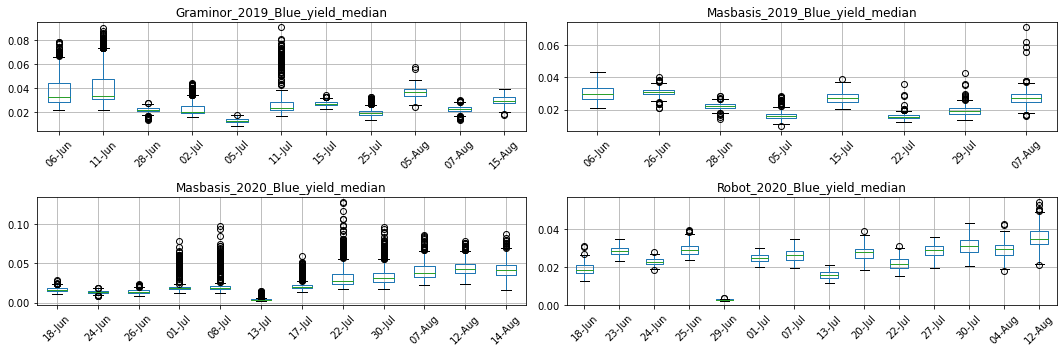

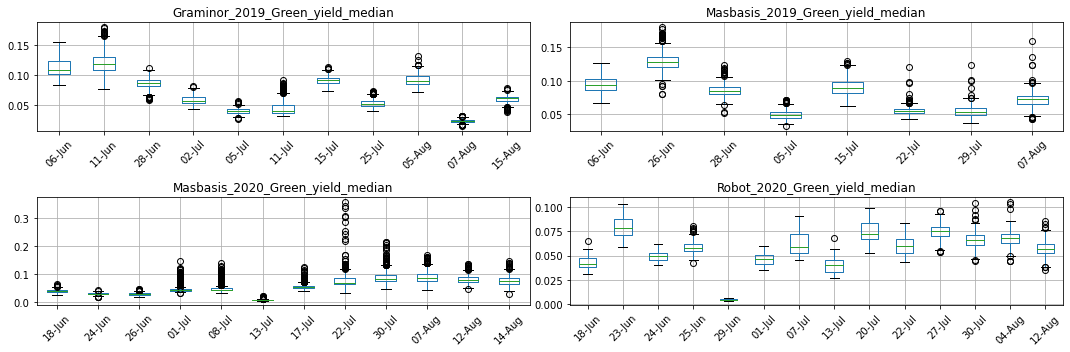

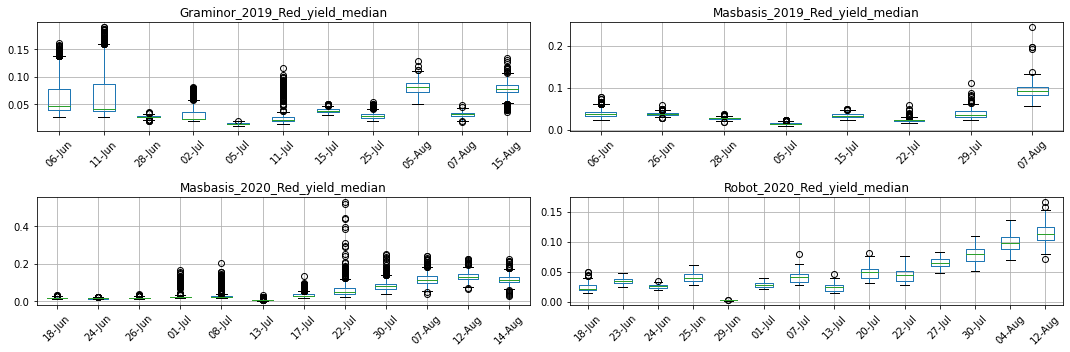

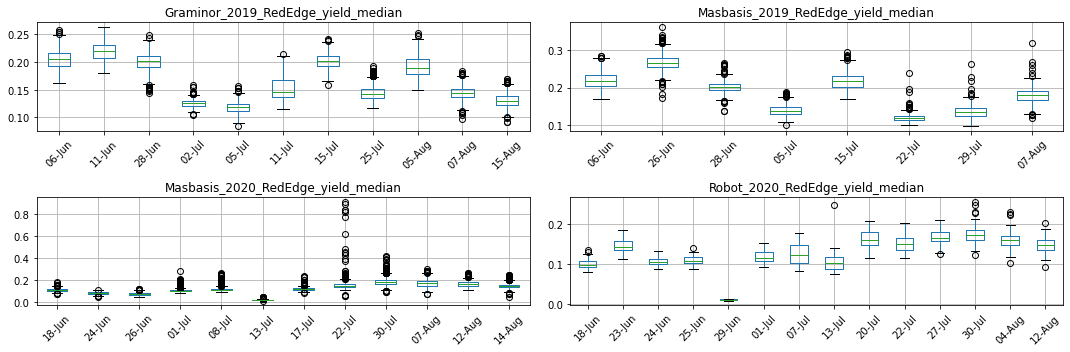

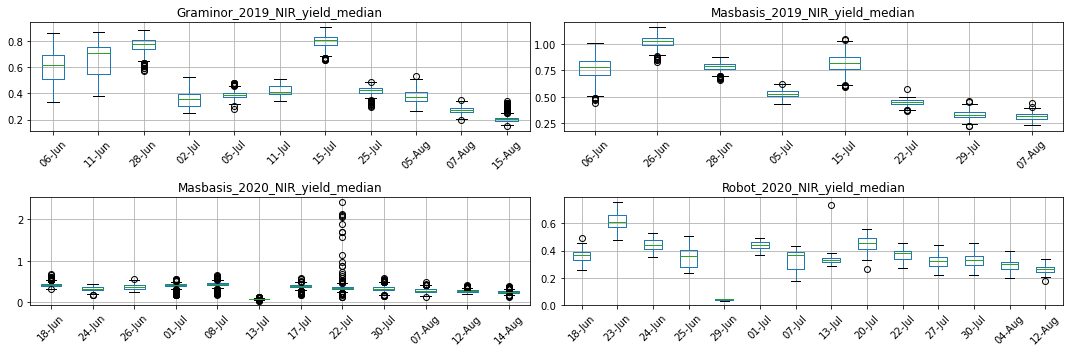

In [97]:
base_indices = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR']
# yield_cols = ['GrainYield']

# data_agg_list = ['_yield_mean_indices', '_yield_median_indices', '_yield_stdev_indices']

# data_agg_list = ['_yield_mean_indices']
data_agg_list = ['_yield_median_indices']
# data_agg_list = ['_yield_stdev_indices']
# base_indices = general_col_names[1:]

# base_indices = ['Blue']
# base_indices = ['Green']
# base_indices = ['Red']
# base_indices = ['RedEdge']
# base_indices = ['NIR']


for d_type in data_agg_list:
    for col in base_indices:
        fields = len(sorted_field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        fig_size=(15,5)
        n_plot = 0
        
        if fields < 2:
            columns = 1
            fig, ax = plt.subplots(rows,columns, figsize=fig_size)
            plots = [ax]
        else:
            columns = 2
            fig, ax = plt.subplots(rows,columns, figsize=fig_size)
            plots = ax.flatten()
            
        for field_sample, dates in sorted_field_year_dict_yield.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                col_name = date.strftime('%d-%b')+'_'+col
                temp_df[col_name] = locals()[field_df][col]
            
            # Adding field plot to the subplots
            
            ax_n = plots[n_plot]
            x_labels = [date[:-(len(col)+1)] for date in temp_df.columns.tolist()]
            temp_df.boxplot(ax=ax_n)

            ax_n.set_xticklabels(x_labels, rotation=45)
            drop_last_part_of_str_dtype = len(d_type.split('_')[-1])+1
            ax_n.set_title(field_sample+'_'+col+d_type[:-(drop_last_part_of_str_dtype)])
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             text = "Grain Yield"
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)

            n_plot += 1
        plt.tight_layout()

# ToDo: Identify df which are outliers

Identify the datasets from the plots above which do not aligh with the trends of their neighbouring datasets.

## Drop outlier datasets

## Update field_year_dict and sorted_field_year_dict

# Merge data at plots

## Merging datasets on Plot_ID 

In [143]:
# data_agg_list = ['_yield_median_indices']
# yield_cols = ['GrainYield']
list_agg_df = []
for d_type in data_agg_list:
    
    for field_sample, dates in sorted_field_year_dict_yield.items():

        # Adding required data to a temp dataframe
        temp_df_all = field_sample+'_all'
        locals()[temp_df_all] = pd.DataFrame()

        for date in dates:
            date_str = date.strftime('%d%m%y')
            field_df = field_sample[:-5]+'_'+date_str+d_type
#             print(field_df)
            temp_df = locals()[field_df].copy()
            temp_df.columns = ['Plot_ID']+[x+'_'+date_str for x in temp_df.columns[1:]]
            
            # Dropping Date Column, if it exists, as it is not necessary...
            # since date imformation is moved to column headings
            if (date_col+'_'+date_str in temp_df.columns):
                temp_df.drop(columns=[date_col+'_'+date_str], inplace=True)
        
            if locals()[temp_df_all].shape[1] < len(base_indices):
                locals()[temp_df_all] = temp_df.copy()
#                 display(temp_df)

            else:
                # Dropping grain yield columns to avoid duplication
                for col in yield_cols:
                    temp_df.drop(columns=[col+'_'+date_str], inplace=True)
                


                # Merging dataframes
#                 locals()[temp_df_all] = pd.concat([locals()[temp_df_all].set_index('Plot_ID'),temp_df.set_index('Plot_ID')], axis=1, join='inner').reset_index()
            
                # The following does not handle duplicate values in the reference column. It will not merge them, rather keep both.
                # So the duplicates should have be dealt with before this step
                locals()[temp_df_all] = locals()[temp_df_all].merge(temp_df, on='Plot_ID', how='left', suffixes=('', date_str))
            
#                 locals()[temp_df_all] = locals()[temp_df_all].join(temp_df, on='Plot_ID', lsuffix='', rsuffix='_right')

#                 display(locals()[temp_df_all])


        list_agg_df.append(temp_df_all)  
        print(temp_df_all, locals()[temp_df_all].shape)
#         display(locals()[temp_df_all].head())
        

Graminor_2019_all (601, 376)
Masbasis_2019_all (528, 274)
Masbasis_2020_all (688, 444)
Robot_2020_all (96, 478)


In [100]:
# Graminor_2019_all (601, 376)
# Masbasis_2019_all (528, 274)
# Masbasis_2020_all (4786, 410)
# Robot_2020_all (96, 478)

## Test: Checking if the number of columns is correct

In [147]:
# Assert if the number of columns is the same as they should be, based on the number of dates/subsets

for field_sample, dates in sorted_field_year_dict_yield.items():
    dates_satasets = len(sorted_field_year_dict_yield[field_sample])
    print(field_sample)
    temp_all_df = field_sample+'_all'
    assert locals()[temp_all_df].shape[1] == (dates_satasets*34)+2

Graminor_2019
Masbasis_2019
Masbasis_2020
Robot_2020


## ToDo: Test: Check if the number of subplots/rows is corect

## Exporting the datasets to csv files

In [150]:
for df in list_agg_df:
    locals()[df].to_csv(export_path)

PermissionError: [Errno 13] Permission denied: './Data/Renamed_merged/'

# END OF SECTION

In [108]:
# base_indices = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']
# yield_cols = ['GrainYield']

for col in base_indices:
    temp_list = [x for x in Robot_2020_all.columns if (x.find(col)==0) if x != 'MTCI-CI']
    print(len(temp_list), temp_list)

# item.lower().find('sum'.lower()) == -1

14 ['Blue_180620', 'Blue_230620', 'Blue_240620', 'Blue_250620', 'Blue_290620', 'Blue_010720', 'Blue_070720', 'Blue_130720', 'Blue_200720', 'Blue_220720', 'Blue_270720', 'Blue_300720', 'Blue_040820', 'Blue_120820']
14 ['Green_180620', 'Green_230620', 'Green_240620', 'Green_250620', 'Green_290620', 'Green_010720', 'Green_070720', 'Green_130720', 'Green_200720', 'Green_220720', 'Green_270720', 'Green_300720', 'Green_040820', 'Green_120820']
28 ['Red_180620', 'RedEdge_180620', 'Red_230620', 'RedEdge_230620', 'Red_240620', 'RedEdge_240620', 'Red_250620', 'RedEdge_250620', 'Red_290620', 'RedEdge_290620', 'Red_010720', 'RedEdge_010720', 'Red_070720', 'RedEdge_070720', 'Red_130720', 'RedEdge_130720', 'Red_200720', 'RedEdge_200720', 'Red_220720', 'RedEdge_220720', 'Red_270720', 'RedEdge_270720', 'Red_300720', 'RedEdge_300720', 'Red_040820', 'RedEdge_040820', 'Red_120820', 'RedEdge_120820']
14 ['RedEdge_180620', 'RedEdge_230620', 'RedEdge_240620', 'RedEdge_250620', 'RedEdge_290620', 'RedEdge_010

In [109]:
xxx = Graminor_2019_all.set_index(['Plot_ID'])
xxx.sort_values(by=['Plot_ID'])
# xxx

,Blue_060619,Green_060619,Red_060619,RedEdge_060619,NIR_060619,GrainYield_060619,NDVI_060619,MTCI_060619,DVI_060619,GDVI_060619,MTCI_CI_060619,EXG_060619,EXGR_060619,RDVI_060619,TDVI_060619,GNDVI_060619,NDRE_060619,SCCI_060619,EVI_060619,TVI_060619,VARI_060619,GARI_060619,GCI_060619,GLI_060619,NLI_060619,MNLI_060619,SAVI_060619,GSAVI_060619,OSAVI_060619,GOSAVI_060619,MSAVI2_060619,MSR_060619,GRVI_060619,WDRVI_060619,SR_060619,Blue_110619,Green_110619,Red_110619,RedEdge_110619,NIR_110619,NDVI_110619,MTCI_110619,DVI_110619,GDVI_110619,MTCI_CI_110619,EXG_110619,EXGR_110619,RDVI_110619,TDVI_110619,GNDVI_110619,...,TVI_070819,VARI_070819,GARI_070819,GCI_070819,GLI_070819,NLI_070819,MNLI_070819,SAVI_070819,GSAVI_070819,OSAVI_070819,GOSAVI_070819,MSAVI2_070819,MSR_070819,GRVI_070819,WDRVI_070819,SR_070819,Blue_150819,Green_150819,Red_150819,RedEdge_150819,NIR_150819,NDVI_150819,MTCI_150819,DVI_150819,GDVI_150819,MTCI_CI_150819,EXG_150819,EXGR_150819,RDVI_150819,TDVI_150819,GNDVI_150819,NDRE_150819,SCCI_150819,EVI_150819,TVI_150819,VARI_150819,GARI_150819,GCI_150819,GLI_150819,NLI_150819,MNLI_150819,SAVI_150819,GSAVI_150819,OSAVI_150819,GOSAVI_150819,MSAVI2_150819,MSR_150819,GRVI_150819,WDRVI_150819,SR_150819
Plot_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
101,0.06242692098021,0.12928310036659,0.12927827239037,0.18556605279446,0.40793709456921,499.6244402277,0.51870970064751,3.95060953155992,0.27865882217884,0.27865399420261,3.95060953155992,0.06686100736260,0.01515452638268,0.38018815635837,0.46858873965149,0.51869605206468,0.37467542128887,0.72232198630787,-0.37945094201929,16.71972244977944,0.00002461564596,0.60384824845029,2.15537833957006,-0.13863215345544,0.12558518039978,0.07000406554417,0.40299078338332,0.40298192548188,0.39967395353608,0.39966426134325,1.29912267889670,2.59255091397603,3.15537833957006,-0.52027713190817,3.15549617910586,0.07959732785821,0.15751262754202,0.16877496242523,0.22030594944954,0.40495406091213,0.41165618067054,3.58324422110322,0.23617909848690,0.24744143337011,3.58324422110322,0.06665296480060,-0.01211935505271,0.31180857210367,0.38821478674485,0.43992193395517,...,12.39767450839286,-0.44829685908051,0.34705920901809,9.47592377645928,-0.37969796383459,0.23061457107990,0.06270996540899,0.40769141933072,0.45059645282095,0.47112916771529,0.52944330826994,1.14477643395190,5.72426775468798,10.47592377645928,-0.24006225571437,6.12822252095596,0.02878511790186,0.05844127014279,0.11751604080200,0.14003725349903,0.21981045603752,0.30325045969983,3.54213619007353,0.10229441523552,0.16136918589473,3.54213619007353,-0.02941861841828,-0.13549980539828,0.17612730749346,0.18804449777752,0.57993956806635,0.22168600889868,0.73103272165890,-0.15032913274955,3.77467408776282,-0.40139899690137,0.85432005007589,2.76121969116074,-0.33383484196942,-0.41728449006312,-0.15589367997898,0.18325184194271,0.31102247601827,0.20568864897727,0.36821118150789,0.87967603786874,1.13929176764454,3.76121969116074,-0.68485297908207,1.87047193334117
102,0.06170477531850,0.12984679639339,0.12785806506872,0.18499064445496,0.40499365329742,515.53275142315,0.52009889182392,3.85074525263736,0.27713558822870,0.27514685690403,3.85074525263736,0.07013075239956,0.02097625769675,0.37965499117319,0.46714794221606,0.51444661125217,0.37289637992163,0.71697207162648,-0.37965015891124,16.70768454670901,0.01014658393168,0.59787687214626,2.11901151623659,-0.13292195633557,0.12389355663566,0.06849880461440,0.40248118384375,0.39882504156013,0.39999264039098,0.39598566408513,1.29545612576009,2.60564996111306,3.11901151623659,-0.51888829338997,3.16752527953356,0.07585316151380,0.15240409970283,0.16335503757000,0.22033466398716,0.40546563267708,0.42563607085852,3.24907305173493,0.24211059510708,0.25306153297424,3.24907305173493,0.06560000032187,-0.01069295257330,0.32101557970696,0.39916597411193,0.45362119198449,...,11.73734098672866,-0.48211758954360,0.36395432656060,9.82710194915940,-0.39243138036

In [110]:
for field_sample, dates in sorted_field_year_dict_yield.items():

    # Adding required data to a temp dataframe
    temp_df_all = field_sample+'_all'
    locals()[temp_df_all] = pd.DataFrame()
    for date in dates:
        date_str = date.strftime('%d%m%y')
        field_df = field_sample[:-5]+'_'+date_str+d_type
        print(field_df, locals()[field_df].shape)

Graminor_060619_yield_median_indices (600, 36)
Graminor_110619_yield_median_indices (600, 36)
Graminor_280619_yield_median_indices (600, 36)
Graminor_020719_yield_median_indices (300, 36)
Graminor_050719_yield_median_indices (600, 36)
Graminor_110719_yield_median_indices (300, 36)
Graminor_150719_yield_median_indices (600, 36)
Graminor_250719_yield_median_indices (600, 36)
Graminor_050819_yield_median_indices (600, 36)
Graminor_070819_yield_median_indices (600, 36)
Graminor_150819_yield_median_indices (600, 36)
Masbasis_060619_yield_median_indices (528, 36)
Masbasis_260619_yield_median_indices (528, 36)
Masbasis_280619_yield_median_indices (528, 36)
Masbasis_050719_yield_median_indices (528, 36)
Masbasis_150719_yield_median_indices (528, 36)
Masbasis_220719_yield_median_indices (528, 36)
Masbasis_290719_yield_median_indices (528, 36)
Masbasis_070819_yield_median_indices (528, 36)
Masbasis_180620_yield_median_indices (688, 36)
Masbasis_240620_yield_median_indices (688, 36)
Masbasis_2606

In [111]:
# list_df_all_indices

# Data Trends

## Normal Distribution of data

ToDo:  
see the distribution of data if it is normal  
else make transpose to make it normal  
dist in Gausion function   
in each field  
what if the data is normal dist?  
the use some transpose to box pox   
try diff funct to see which one iis able to make data normal  
make heat map of whole if not normal  
see which parts are not normal and exculde them  
ls_means in R to make the normalisation/transpose  
pearson corr bw yield and indices for diff dates  


In [ ]:
x_labels

### Yeo-Johnson Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_indices']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        

        for field_sample, dates in sorted_field_year_dict_yield.items():
            x_labels = []
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                temp_df[date] = locals()[field_df][col]
                x_label = date.strftime('%d-%m-%y')+':'+str(len(locals()[field_df][col]))
                
                x_labels.append(x_label)
                x_labels= list(set(x_labels))
            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='yeo-johnson', standardize=False)

            temp_arr = pt.fit_transform(temp_df)
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict_yield.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]
            
            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=-35)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5]+'_yeo-johnson')
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### Box-Cox Transformation

In [ ]:
col_for_plotting = ['Blue', 'Green', 'Red', 'RedEdge', 'NIR', 'NDVI', 'MTCI', 'EVI']

from sklearn.preprocessing import PowerTransformer, normalize, StandardScaler
data_agg_list = ['_median_indices']

# col_for_plotting = ['Blue']
# col_for_plotting = ['Green']
# col_for_plotting = ['Red']

for d_type in data_agg_list:
    for col in col_for_plotting:
        fields = len(field_year_dict_yield.keys())
        rows = math.ceil(fields/2)
        
        fig, ax = plt.subplots(rows,2, figsize=(15,10))
        plots = ax.flatten()
        n = 0
        # TODO: Fix the x ticks
        for field_sample, dates in sorted_field_year_dict_yield.items():
            
            # Adding required data to a temp dataframe
            temp_df = pd.DataFrame()
            for date in dates:
                date_str = date.strftime('%d%m%y')
                field_df = field_sample[:-5]+'_'+date_str+d_type
                temp_df[date] = locals()[field_df][col]
            x_labels = temp_df.columns.tolist()

            # Transform the df
#             pt = PowerTransformer(method='box-cox', standardize=False)
            pt = PowerTransformer(method='box-cox', standardize=False)

            # Taking absolute values of the dataframe(avoiding negative values)
            temp_arr = pt.fit_transform(temp_df.abs())
            temp_df = pd.DataFrame(temp_arr)
            
            # Adding field plot to the subplots
            num_of_fields = len(field_year_dict_yield.keys())
            
            text = "Grain Yield"
            ax_n = plots[n]

            temp_df.boxplot(ax=ax_n)
            ax_n.set_xticklabels(x_labels, rotation=90)
            ax_n.set_title(field_sample+'_'+col+d_type[:-5]+'_box-cox')
            
#             # Printing the grain yield in plot of the fiels_sample for reference
#             ax_n.text(0.85, 1.05, text, ha='center', va='top', weight='bold', color='blue', transform=ax_n.transAxes)
            n+=1
        plt.tight_layout()



### ToDo: Identify Dates and index with problems

### Ecxclude the problematic data/dates
or
### Take average values where the problematic data is

Take average of data for date 20200708 and 20200624  
Masbasis  
Cleanup  
Remove dates which have drop  

## ToDo: Remove outliers

### Find AUC for all dates of one field
See if it covers tha gaps under the dates,i.e.

Since data points are different  
Flying time is different  
Cover the gaps between the dates  

Since the data collection is not uniform throughout the year so AUC will give a single value instead of multiple values for one field year which will be representative of all the dates 

#### Option 1: Use Scipy

In [ ]:
import scipy
scipy.__version__

In [ ]:
from scipy import integrate
from scipy.integrate import simps

In [ ]:
from scipy.integrate import simpson

In [ ]:
x = np.arange(0, 10)
y = np.arange(0, 10)


In [ ]:
# integrate.simpson(y, x)
integrate.simps(y, x)

In [ ]:
y = np.power(x, 3)
y

In [ ]:
integrate.simpson(y, x)
# integrate.simps(y, x)


In [ ]:
integrate.quad(lambda x: x**3, 0, 9)[0]

In [ ]:
integrate.simpson(y, x, even='first')
# integrate.simps(y, x, even='first')

#### Option 2

In [ ]:
data
# plot: Plot ID
# x: Number of days after sowing or actual date
# y: Value of the index


In [ ]:
# x: Days from sowing to data collection
# May 5 2019 Masbasis and Graminor
# Robot: 

data={'plot':['1','1','2','2','3','3'],'x':['5','6','7','8','9','10'],'y':['0.9','0.8','0.7','0.6','0.5','0.4'] }

ACC=[]
A=pd.DataFrame(data, columns=['plot','x','y'])
AA=0

for item in range(len(A)-1):
    if A['plot'][item]== A['plot'][item+1]:
        Ans=(float((A['y'][item]))+float((A['y'][item+1])))*((float((A['x'][item+1]))-float((A['x'][item]))))/2
        AA+=Ans
        print(AA)
        ACC.append(AA)

### Alternative

In [ ]:
df1=Data.set_index(['Plot'])
ACC=[]

for item in Numbers_final:
    df2=df1[df1.index==item]
    df2=df2.filter(['Blue', 'Green', 'Red', 'RedEdge', 'NIR','NDVI', 'MTCI', 'EVI', 'DVI', 'RVI', 'VARI', 'EXG', 'EXGR', 'GLI', 'GNDVI', 'GVI','Time','timepoint'], axis=1)
    df2=df2.sort_values(by='timepoint')
    df3=df2.reset_index()

AA=0
for j in range(0,3):
    Ans=(float((df3['GVI'][j]))+float((df3['GVI'][j+1])))*((float((df3['timepoint'][j+1]))-float((df3['timepoint'][j]))))/2
    AA+=Ans

    print(AA)
    ACC.append(AA)



DA=pd.DataFrame(ACC)
DD=pd.DataFrame(Numbers_final)
DDA=pd.concat([DD, DA], axis=1)
DDA.to_excel('Staur_Accumulative_GVI_2019.xlsx')

### Time series data vs the AUC

# ToDo: Model Training


Make model for one year at a time and try to predict yield of another field  

TODO: Train on Masbasis 2019 an 2020  
Test on Staur  

Use data until august for yield prediction since it is most relavant  
Use all data for predicting date to maturity  

Data Collection:  
Data collection usually starts after heading  
2019 has the data before hading as well. To use that, dont use dates before heading  

NDVI is resistant to shadows  

DAT390 Report: Do the report with Robot Data only  

TODO: Use AUC for each index for prediction  

TODO:   
Time series data vs the AUC  